In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import pandas as pd
import os

In [38]:
#Carreguem les taules de la base de dades (Prèviament passades a dataframe i guardades en arxiu .pickle)

demog = pd.read_pickle('C:/Users/jbakk/OneDrive/Documentos/Proyectozero/tablas/demog.pickle')
diag_dic = pd.read_csv('C:/Users/jbakk/OneDrive/Documentos/Proyectozero/tablas/diag_dic.csv', delimiter=';')
diag_events = pd.read_pickle('C:/Users/jbakk/OneDrive/Documentos/Proyectozero/tablas/diag_events.pickle')
k_anon_set = pd.read_pickle('C:/Users/jbakk/OneDrive/Documentos/Proyectozero/tablas/k_anon_set.pickle')
lab_events = pd.read_pickle('C:/Users/jbakk/OneDrive/Documentos/Proyectozero/tablas/lab_events.pickle')
monitor_dic = pd.read_pickle('C:/Users/jbakk/OneDrive/Documentos/Proyectozero/tablas/monitor_dic.pickle')
monitor_events = pd.read_pickle('C:/Users/jbakk/OneDrive/Documentos/Proyectozero/tablas/monitor_events.pickle')
ward_stay_events = pd.read_pickle('C:/Users/jbakk/OneDrive/Documentos/Proyectozero/tablas/ward_stay_events.pickle')

Control de qualitat d'integritat referencial

In [39]:
# Creem una llista de tuples amb les taules i els seus respectius noms
tables = [
    ("demog", demog),
    ("ward_stay_events", ward_stay_events),
    ("lab_events", lab_events),
    ("monitor_events", monitor_events),
    ("diag_events", diag_events)
]

# Llista per emmagatzemar els resultats parcials
results = []

# Process each dataframe and calculate the required metrics
for name, df in tables:
    total_rows = len(df)
    unique_patient_id_count = df['patient_id'].nunique()
    unique_hosp_stay_id_count = df['hosp_stay_id'].nunique() if 'hosp_stay_id' in df.columns else 0
    unique_ward_stay_id_count = df['ward_stay_id'].nunique() if 'ward_stay_id' in df.columns else 0
    results.append({
        "table_name": name,
        "total_rows": total_rows,
        "unique_patient_id_count": unique_patient_id_count,
        "unique_hosp_stay_id_count": unique_hosp_stay_id_count,
        "unique_ward_stay_id_count": unique_ward_stay_id_count
    })

# Convert the list of results to a DataFrame
result_df = pd.DataFrame(results)

# Display the resulting DataFrame
print(result_df)

         table_name  total_rows  unique_patient_id_count  \
0             demog       13676                     8480   
1  ward_stay_events       22297                     7289   
2        lab_events     3284730                     8541   
3    monitor_events     1051616                     7408   
4       diag_events      123297                     8480   

   unique_hosp_stay_id_count  unique_ward_stay_id_count  
0                          0                          0  
1                       7901                       8352  
2                      12288                      15705  
3                       8036                       8500  
4                      14461                          0  


### DESCRIPCIÓ DE LES TAULES

#### Demog

Distribució sexe/edat

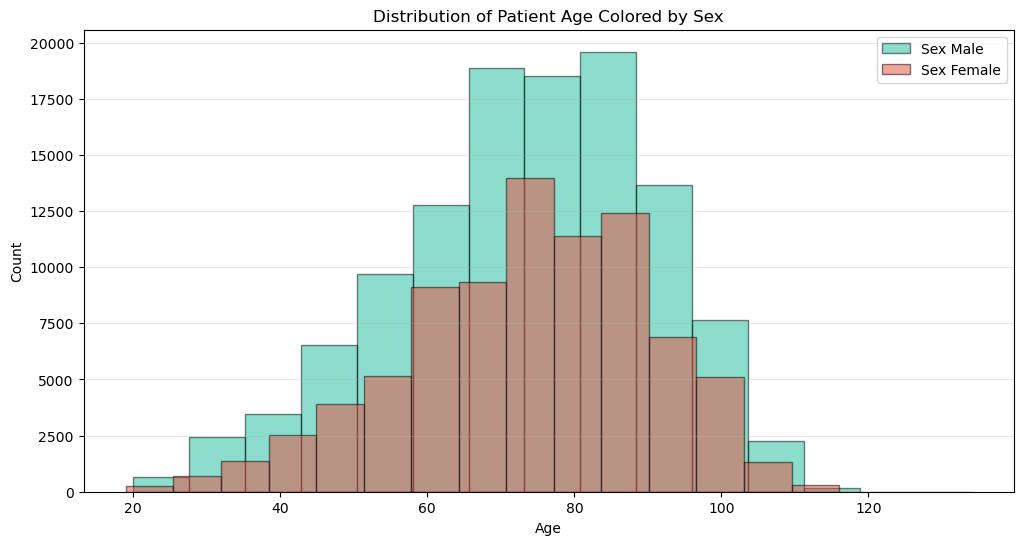

In [40]:
# Unir a les taules basades en la columna comuna 'stay_id'
merged_table = pd.merge(ward_stay_events, k_anon_set, on='stay_id', how='inner')

# Definir categories d'edat amb clústers cada cinc anys
age_categories = ['15.0', '20.0', '25.0', '30.0', '35.0', '40.0', '45.0', '50.0', '55.0', '60.0', '65.0', '70.0', '75.0', '80.0', '85.0', '>89.0']

# Colors del gràfic
color1 = '#1abc9c'
color2 = '#e74c3c'

# Graficar la distribució de l'edat del pacient per sexe amb papereres
plt.figure(figsize=(12, 6))

# Recorrer cada valor sexual únic i dibuixa un histograma amb transparència
for i, sex_value in enumerate(merged_table['Sex'].unique()):
    if sex_value == 3:
      continue
    subset_data = merged_table[merged_table['Sex'] == sex_value]
    subset_data_numeric = pd.to_numeric(subset_data['age'], errors='coerce')
    plt.hist(subset_data_numeric.dropna(), bins=len(age_categories) - 1, color=color1 if i == 0 else color2, alpha=0.5, label=f'Sex {"Male" if sex_value == 1 else "Female"}', edgecolor='black')

plt.title('Distribution of Patient Age Colored by Sex')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.show()

Nacionalitat dels pacients

C:\Users\jbakk\AppData\Local\Temp\ipykernel_3116\4211255363.py:24: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


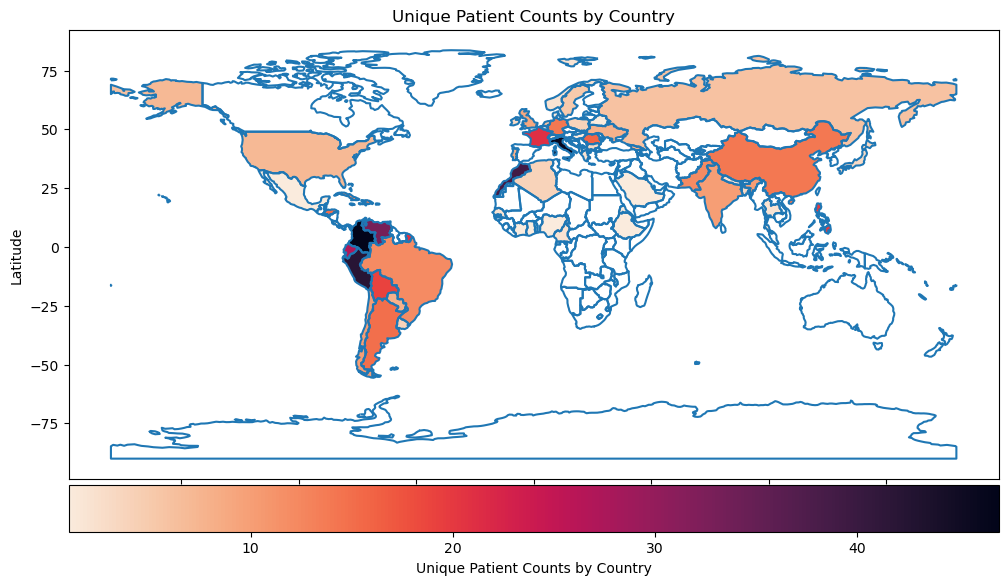

In [41]:
# Definir la llista de països i els seus codis ISO Alpha-3 corresponents
country_mapping = {
    'ES': 'ESP', 'MA': 'MAR', 'SN': 'SEN', 'DE': 'DEU', 'PE': 'PER', 'US': 'USA', 'PH': 'PHL', 'HN': 'HND',
    'CO': 'COL', 'EC': 'ECU', 'DO': 'DOM', 'VE': 'VEN', 'NL': 'NLD', 'IT': 'ITA', 'AR': 'ARG', 'CN': 'CHN',
    'BO': 'BOL', 'IN': 'IND', 'DZ': 'DZA', 'PY': 'PRY', 'RO': 'ROU', 'GH': 'GHA', 'UA': 'UKR', 'CL': 'CHL',
    'PK': 'PAK', 'AL': 'ALB', 'GM': 'GMB', 'BR': 'BRA', 'GR': 'GRC', 'PT': 'PRT', 'NP': 'NPL',
    'ER': 'ERI', 'GB': 'GBR', 'UY': 'URY', 'FR': 'FRA', 'CU': 'CUB', 'BD': 'BGD', 'CM': 'CMR', 'AD': 'AND',
    'NI': 'NIC', 'RU': 'RUS', 'PL': 'POL', 'TH': 'THA', 'SE': 'SWE', 'IL': 'ISR', 'GE': 'GEO', 'BG': 'BGR',
    'ET': 'ETH', 'MX': 'MEX', 'HU': 'HUN', 'DM': 'DMA', 'SA': 'SAU', 'SC': 'SYC', 'CI': 'CIV', 'BY': 'BLR',
    'JP': 'JPN', 'LV': 'LVA', 'IE': 'IRL', 'SG': 'SGP', 'NG': 'NGA', 'PR': 'PRI', 'NO': 'NOR', 'SV': 'SLV',
    'VN': 'VNM', 'CR': 'CRI', 'GQ': 'GNQ', 'AM': 'ARM', 'DK': 'DNK', 'CH': 'CHE', '*': '*'
}

# Assignar els codis de país al DataFrame amb els codis ISO Alpha-3
demog['iso_alpha3'] = demog['natio_ref'].map(country_mapping)

# Filtrar les dades dels països seleccionats
filtered_data = demog[demog['iso_alpha3'].notnull() & (demog['iso_alpha3'] != 'ESP') & (demog['iso_alpha3'] != '*')]

# Crear un DataFrame amb un nombre de pacients únic per país
patient_count_df = filtered_data.groupby('iso_alpha3')['patient_id'].nunique().reset_index(name='patient_count')

# Carreguar el mapa del món des de conjunts de dades de geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Combinar les dades del recompte de pacients amb el mapa del món
world = world.merge(patient_count_df, left_on='iso_a3', right_on='iso_alpha3', how='left')

# Graficar el mapa amb el codi de color del mapa de calor
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

# Utilitzar la paleta de colors del mapa de calor de seaborn
cmap = sns.cm.rocket_r

# Graficar el mapa
world.boundary.plot(ax=ax)
world.plot(column='patient_count', ax=ax, cmap=cmap, legend=True, legend_kwds={'label': "Unique Patient Counts by Country", 'orientation': 'horizontal', 'pad': 0.01})

# Afegir etiquetes, títol i mostra la trama
ax.set_title('Unique Patient Counts by Country')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
plt.show()

In [42]:
# Diccionari per a l'assignació de codi de país a nom de país
country_names = {
    'ESP': 'Spain', 'MAR': 'Morocco', 'SEN': 'Senegal', 'DEU': 'Germany', 'PER': 'Peru', 'USA': 'United States',
    'PHL': 'Philippines', 'HND': 'Honduras', 'COL': 'Colombia', 'ECU': 'Ecuador', 'DOM': 'Dominican Republic',
    'VEN': 'Venezuela', 'NLD': 'Netherlands', 'ITA': 'Italy', 'ARG': 'Argentina', 'CHN': 'China', 'BOL': 'Bolivia',
    'IND': 'India', 'DZA': 'Algeria', 'PRY': 'Paraguay', 'ROU': 'Romania', 'GHA': 'Ghana', 'UKR': 'Ukraine',
    'CHL': 'Chile', 'PAK': 'Pakistan', 'ALB': 'Albania', 'GMB': 'Gambia', 'BRA': 'Brazil', 'GRC': 'Greece',
    'PRT': 'Portugal', 'NPL': 'Nepal', 'ERI': 'Eritrea', 'GBR': 'United Kingdom', 'URY': 'Uruguay', 'FRA': 'France',
    'CUB': 'Cuba', 'BGD': 'Bangladesh', 'CMR': 'Cameroon', 'AND': 'Andorra', 'NIC': 'Nicaragua', 'RUS': 'Russia',
    'POL': 'Poland', 'THA': 'Thailand', 'SWE': 'Sweden', 'ISR': 'Israel', 'GEO': 'Georgia', 'BGR': 'Bulgaria',
    'ETH': 'Ethiopia', 'MEX': 'Mexico', 'HUN': 'Hungary', 'DMA': 'Dominica', 'SAU': 'Saudi Arabia', 'SYC': 'Seychelles',
    'CIV': 'Ivory Coast', 'BLR': 'Belarus', 'JPN': 'Japan', 'LVA': 'Latvia', 'IRL': 'Ireland', 'SGP': 'Singapore',
    'NGA': 'Nigeria', 'PRI': 'Puerto Rico', 'NOR': 'Norway', 'SLV': 'El Salvador', 'VNM': 'Vietnam', 'CRI': 'Costa Rica',
    'GNQ': 'Equatorial Guinea', 'ARM': 'Armenia', 'DNK': 'Denmark', 'CHE': 'Switzerland', '*': 'Other'
}

# Crear una taula amb el nombre total de pacients i el percentatge
table_data = []
for idx, row in patient_count_df.iterrows():
    country_code = row['iso_alpha3']
    count = row['patient_count']
    percentage = (count / filtered_data['patient_id'].nunique()) * 100

    # Get the full country name from the ISO code
    country_name = country_names.get(country_code, 'Unknown')

    table_data.append([country_code, country_name, count, f'{percentage:.2f}%'])

# Crear un DataFrame pandas amb les dades de la taula
country_patient_table = pd.DataFrame(table_data, columns=['Country Code', 'Country Name', 'Total Patients', '% of Total'])

# Ordenar el DataFrame per la columna "Total de pacients" en ordre descendent
country_patient_table = country_patient_table.sort_values(by='Total Patients', ascending=False)

# Imprimir el DataFrame ordenat
country_patient_table

,Country Code,Country Name,Total Patients,% of Total
14,COL,Colombia,47,8.16%
36,ITA,Italy,46,7.99%
45,PER,Peru,42,7.29%
38,MAR,Morocco,39,6.77%
61,VEN,Venezuela,33,5.73%
...,...,...,...,...
35,ISR,Israel,1,0.17%
48,PRI,Puerto Rico,1,0.17%
6,BLR,Belarus,1,0.17%
3,ARM,Armenia,1,0.17%


<BarContainer object of 62 artists>

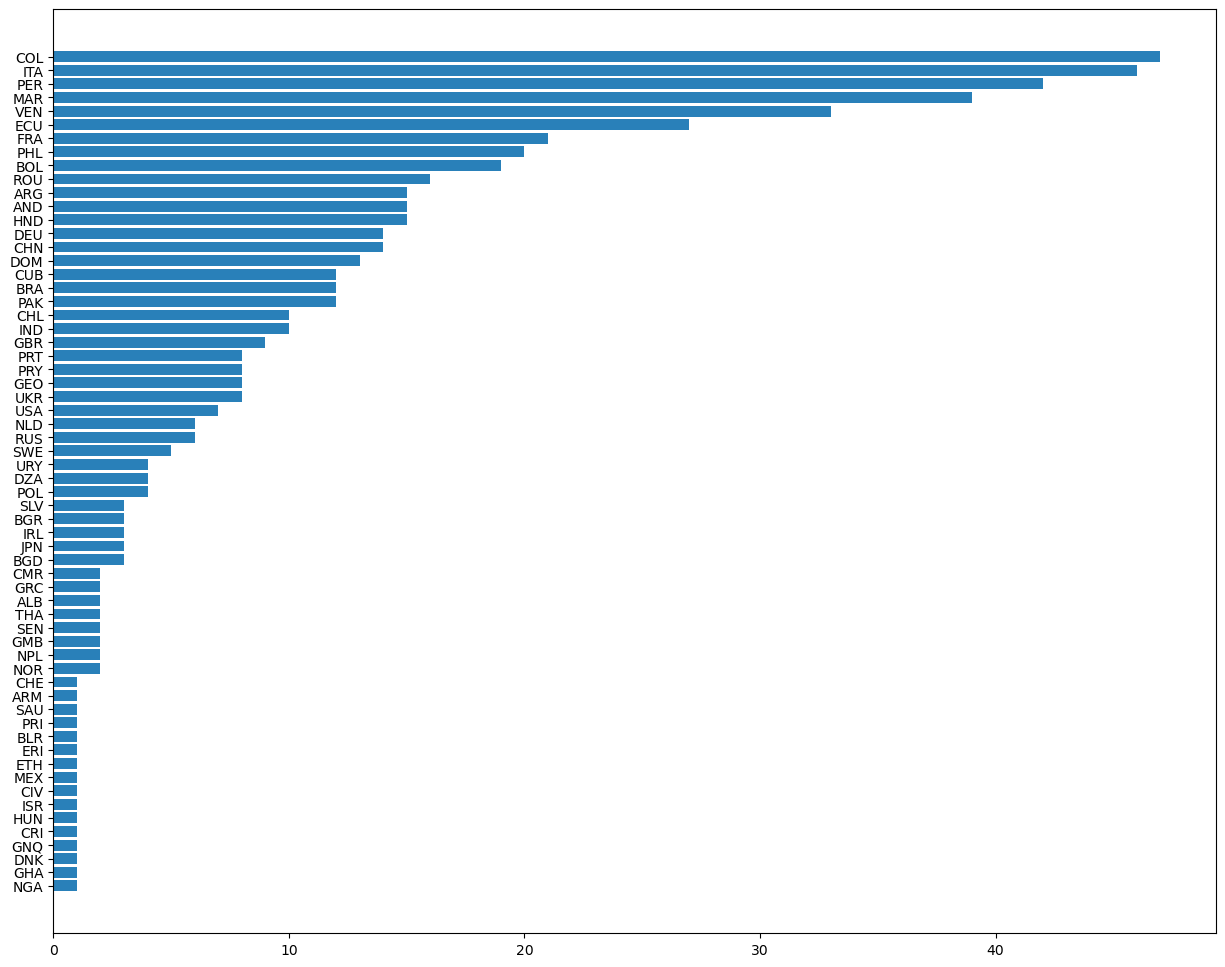

In [43]:
#Gràfic de barres
fig, ax = plt.subplots(figsize=(15, 12))
patient_count_df = patient_count_df.sort_values(by='patient_count', ascending=True)
ax.barh(patient_count_df['iso_alpha3'], patient_count_df['patient_count'], color='#2980b9')

#### Diag events

C:\Users\jbakk\AppData\Local\Temp\ipykernel_3116\1610080483.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  diag_type_counts = top_diagnoses_df.groupby(['icd', 'diag_type']).size().unstack().fillna(0)


Advertència: els següents codis ICD no s'han trobat a diag_dic: {''}


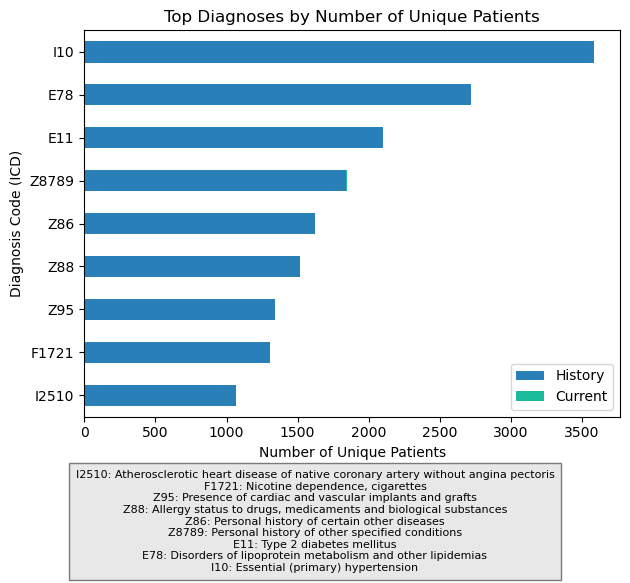

In [44]:
# Filtrar els diagnòstics i contar els pacients únics
filtered_diagnoses = diag_events[diag_events['icd'] != '*']
top_diagnoses = filtered_diagnoses['icd'].value_counts().head(10)

# Crear un DataFrame amb els diagnòstics principals
top_diagnoses_df = filtered_diagnoses[filtered_diagnoses['icd'].isin(top_diagnoses.index)]

# Ordenar les categories pel nombre de pacients únics en ordre descendente
sorted_diagnoses = top_diagnoses_df.groupby('icd')['patient_id'].nunique().sort_values(ascending=False).index
top_diagnoses_df = top_diagnoses_df.copy()  # Asegurarse de que no estamos trabajando con una vista
top_diagnoses_df['icd'] = pd.Categorical(top_diagnoses_df['icd'], categories=sorted_diagnoses, ordered=True)

# Comptar el nombre de diagnòstics de tipus H i C a cada categoria
diag_type_counts = top_diagnoses_df.groupby(['icd', 'diag_type']).size().unstack().fillna(0)

# Ordenar les barres pel recompte en ordre descendent
ordered_diag_type_counts = diag_type_counts.sum(axis=1).sort_values(ascending=False).index
diag_type_counts = diag_type_counts.loc[ordered_diag_type_counts]

# Invertir l'ordre de les barres
diag_type_counts = diag_type_counts.iloc[::-1]

# Obtenir descripcions per als codis ICD
# Filtrar aquells codis ICD que estan a diag_type_counts però no a diag_dic
missing_icd = set(diag_type_counts.index) - set(diag_dic['icd'])
if missing_icd:
    print(f"Advertència: els següents codis ICD no s'han trobat a diag_dic: {missing_icd}")

# Continuar només amb els codis ICD que estan a diag_dic
diag_type_counts = diag_type_counts.loc[~diag_type_counts.index.isin(missing_icd)]
icd_descriptions = diag_dic.set_index('icd').loc[diag_type_counts.index, 'description']

# Crear un plot de barres horitzontal amb colors personalitzats
fig, ax = plt.subplots()
diag_type_counts.plot(kind='barh', stacked=True, color=['#2980b9', '#1abc9c'], ax=ax)
ax.set_xlabel('Number of Unique Patients')
ax.set_ylabel('Diagnosis Code (ICD)')
ax.set_title('Top Diagnoses by Number of Unique Patients')

# Actualitzar les etiquetes de la llegenda
ax.legend(['History', 'Current'])

# Afegir descripcions com una llegenda a la part inferior del plot
descriptions_text = '\n'.join([f"{code}: {description}" for code, description in zip(diag_type_counts.index, icd_descriptions)])
plt.figtext(0.5, -0.2, descriptions_text, ha="center", fontsize=8, bbox={"facecolor": "lightgrey", "alpha": 0.5, "pad": 5})

plt.tight_layout()
plt.show()

#### Monitor Events

Distribució dels vitals

C:\Users\jbakk\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\jbakk\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\jbakk\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\jbakk\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

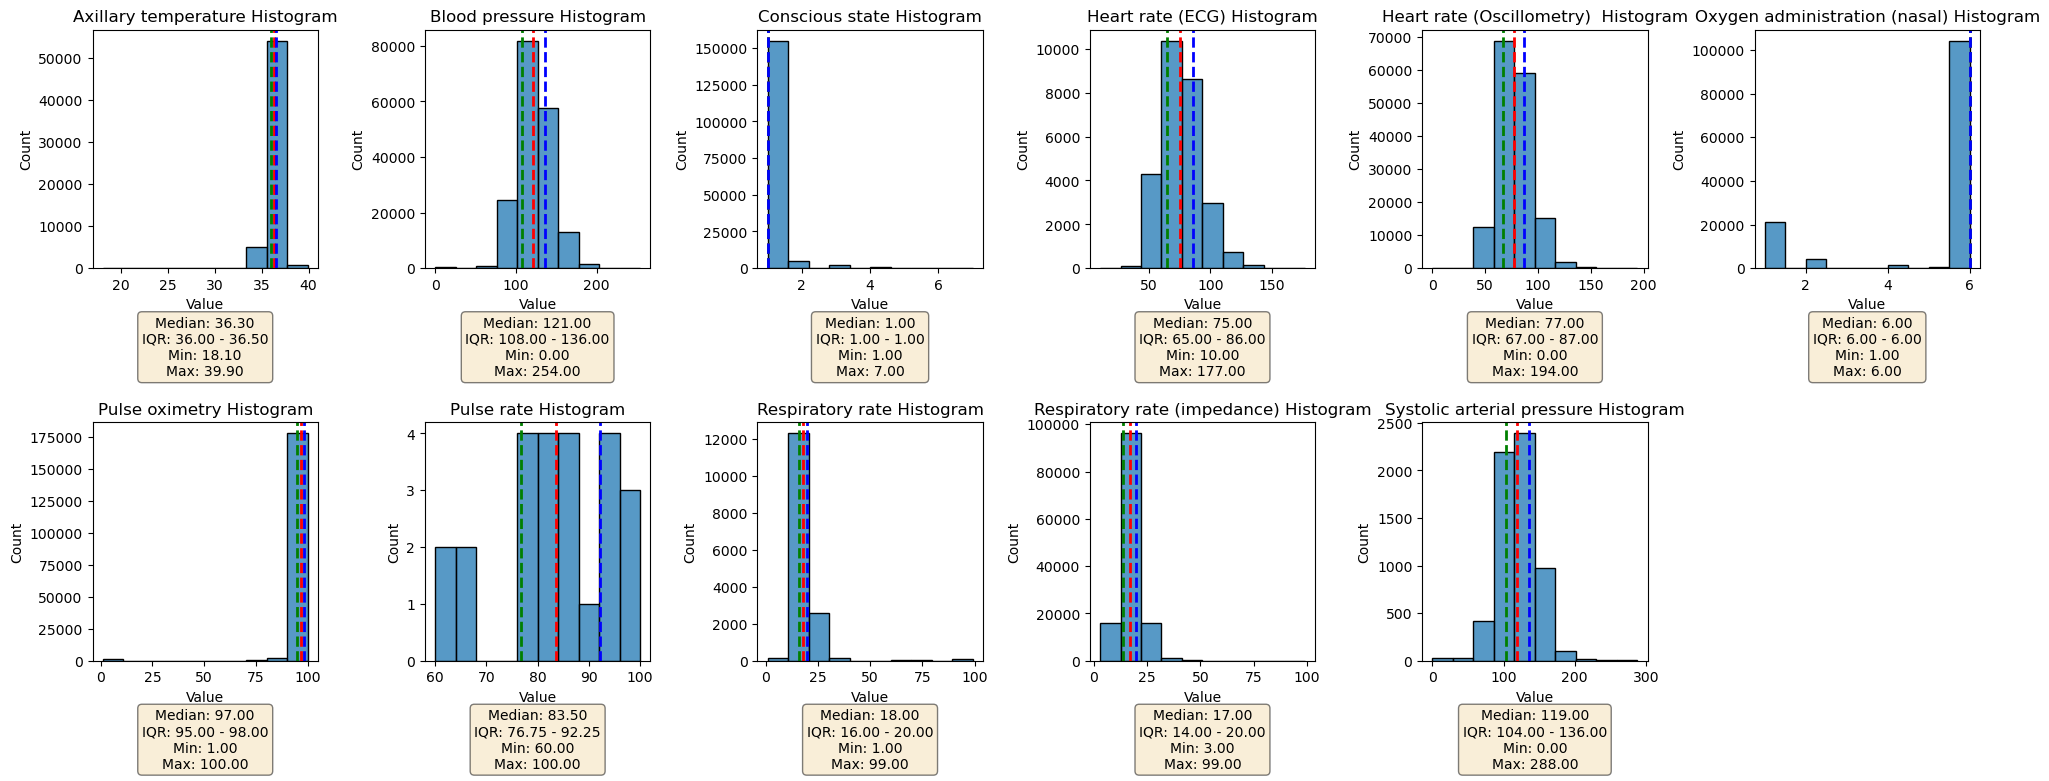

In [45]:
# Convertir 'value' column to numeric
monitor_events['value'] = pd.to_numeric(monitor_events['value'], errors='coerce')

# Crear un diccionari per assignar monitor_events_id als seus noms respectius
item_names = {
    1: 'Conscious state',
    2: 'Heart rate (ECG)',
    3: 'Heart rate (Oscillometry) ',
    4: 'Respiratory rate (impedance)',
    5: 'Respiratory rate',
    6: 'Oxygen administration (nasal)',
    7: 'Systolic arterial pressure',
    8: 'Blood pressure',
    9: 'Pulse oximetry',
    10: 'Pulse rate',
    11: 'Axillary temperature'
}

# Assignar l'identificador d'esdeveniments del monitor als noms dels elements
monitor_events['item'] = monitor_events['m_item_id'].map(item_names)

# Crear una graella d'histogrames
items = monitor_events.groupby('item')

# Calcular el nombre de files i columnes per a subtrama
n_items = len(items)
rows, cols = divmod(n_items, 6)
if cols == 0:
    rows -= 1
    cols = 6

# Crear subplots
fig, axes = plt.subplots(rows + 1, 6, figsize=(20, 8), constrained_layout=True)

# Aplanar la matriu d'eixos per iterar
axes = axes.flatten()

# Graficar histogrames per a cada element
for i, (item, item_data) in enumerate(items):
    ax = axes[i]
    sns.histplot(data=item_data, x='value', bins=10, edgecolor='black', ax=ax, stat='count')
    ax.set_title(f'{item} Histogram')
    ax.set_xlabel('Value')
    ax.set_ylabel('Count')

    # Calcular estadístiques
    median = item_data['value'].median()
    q1 = item_data['value'].quantile(0.25)
    q3 = item_data['value'].quantile(0.75)
    minimum = item_data['value'].min()
    maximum = item_data['value'].max()

    # Imprimir valors
    textstr = f'Median: {median:.2f}\nIQR: {q1:.2f} - {q3:.2f}\nMin: {minimum:.2f}\nMax: {maximum:.2f}'
    ax.text(0.5, -0.2, textstr, transform=ax.transAxes, fontsize=10,
            verticalalignment='top', horizontalalignment='center',
            bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

    # Afegir línies verticals per a la mitjana i l'IQR
    ax.axvline(median, color='red', linestyle='dashed', linewidth=2, label='Median')
    ax.axvline(q1, color='green', linestyle='dashed', linewidth=2, label='Q1')
    ax.axvline(q3, color='blue', linestyle='dashed', linewidth=2, label='Q3')

# Eliminar subplots buits
for i in range(n_items, len(axes)):
    fig.delaxes(axes[i])

# Ajustar la disposició i mostrar les trames
plt.tight_layout()
plt.show()

Resolució dels vitals

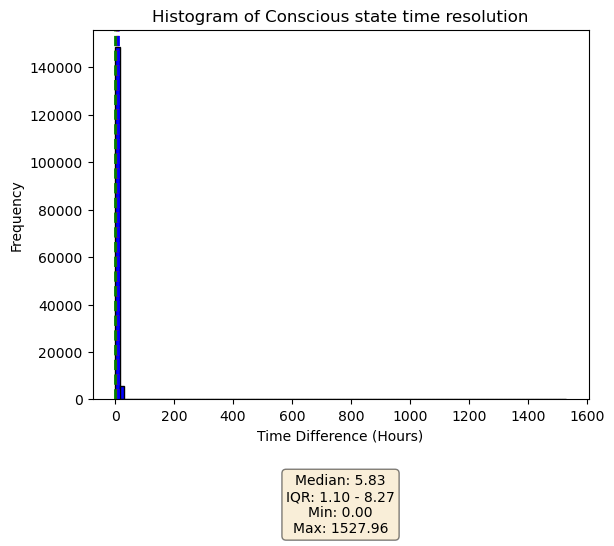

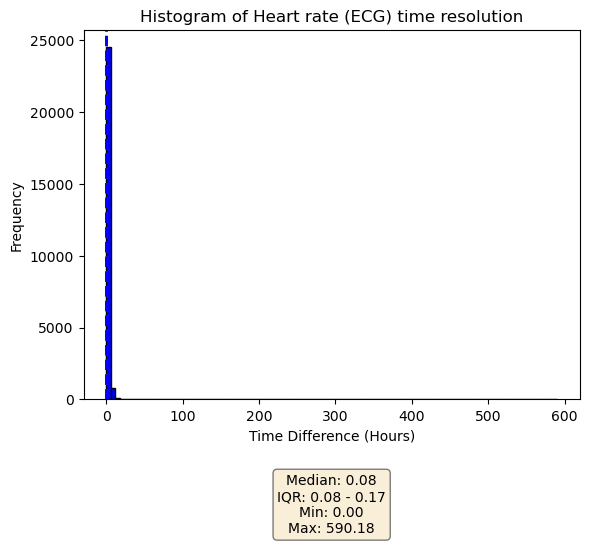

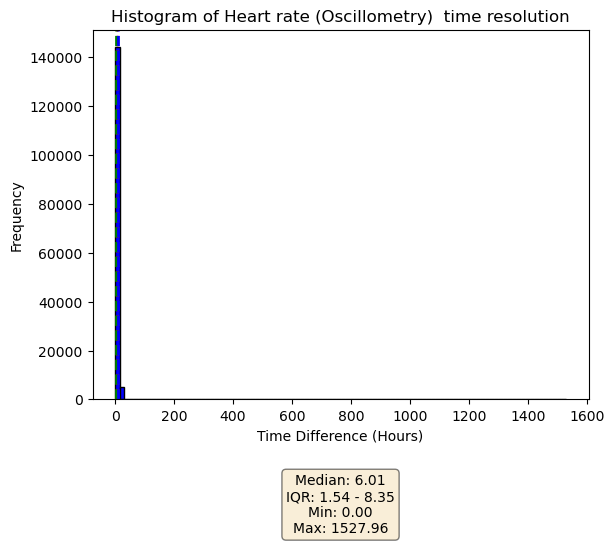

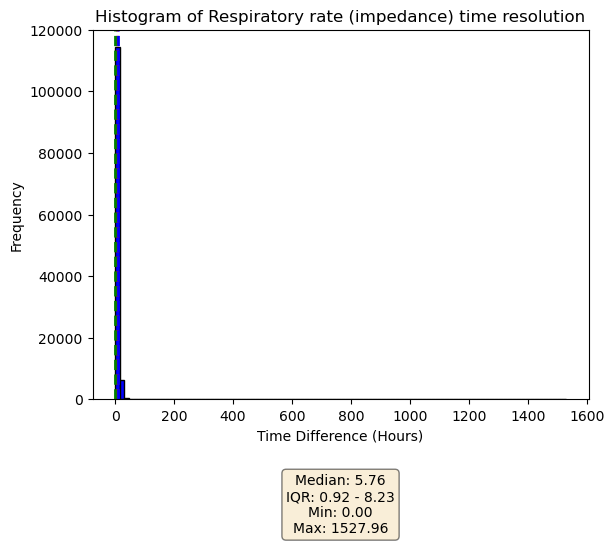

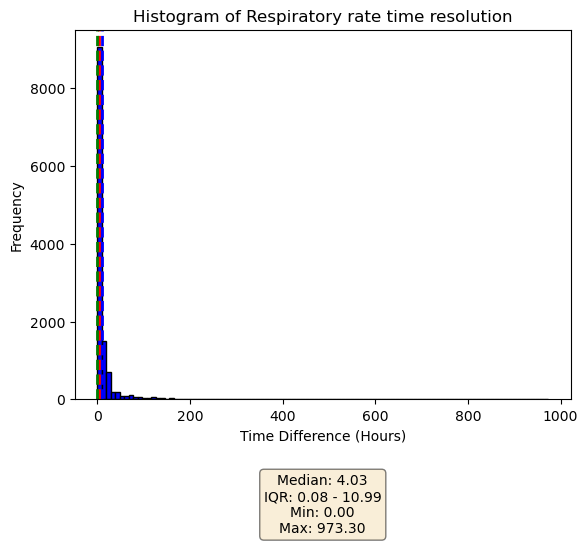

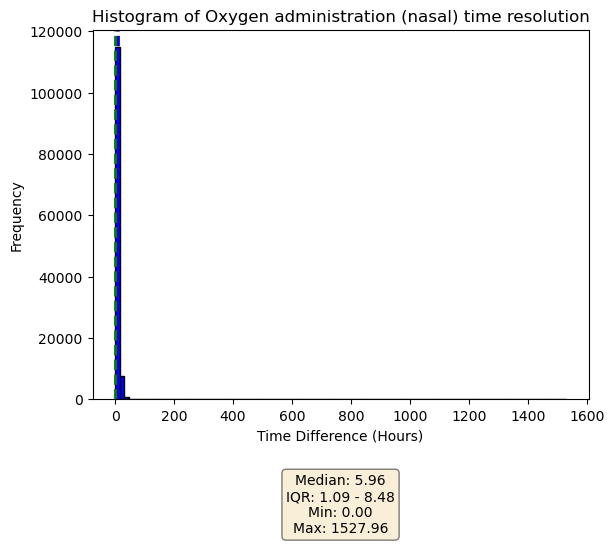

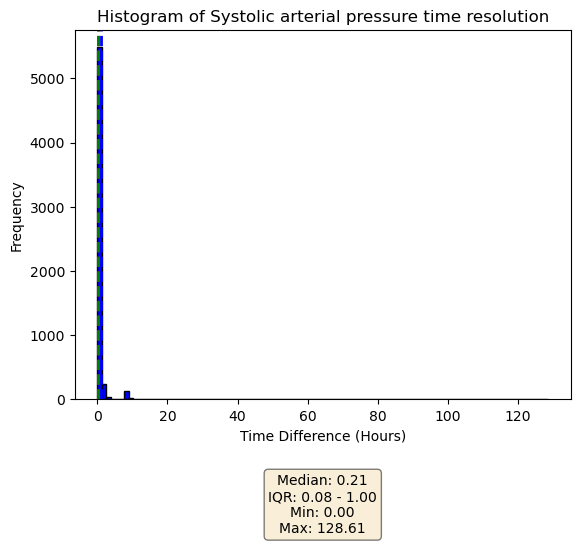

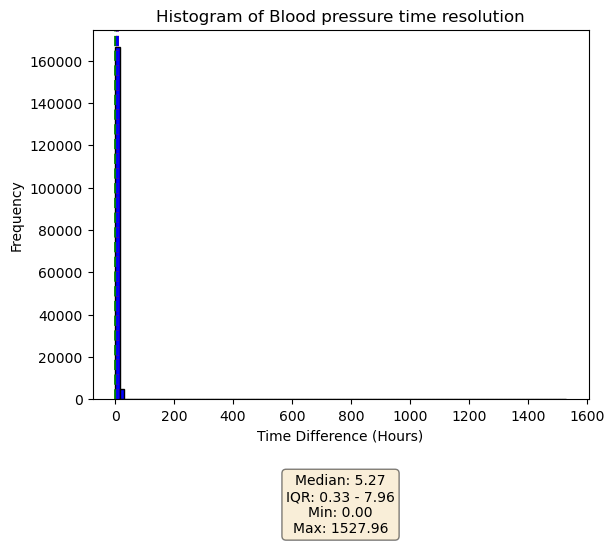

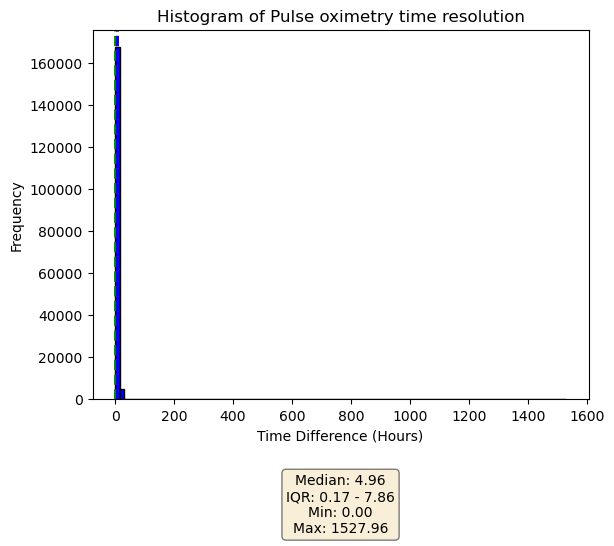

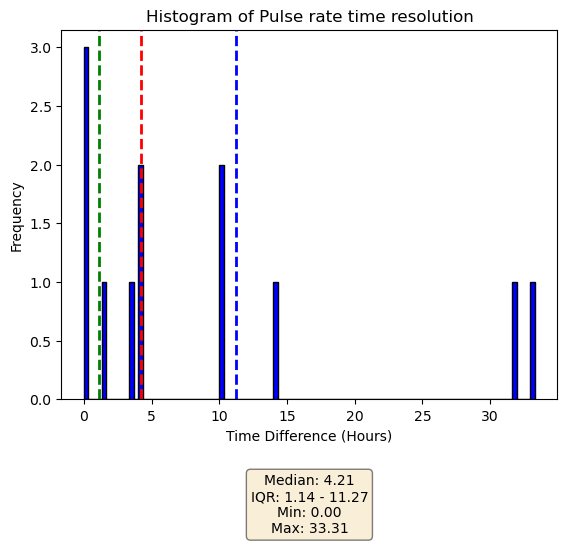

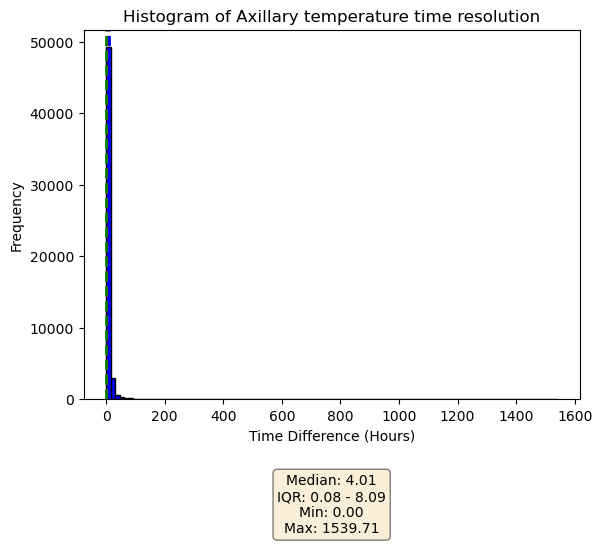

In [46]:
# Crear DataFrames per a cada esdeveniment
monitor_events_dict = {}
for event_id, event_name in item_names.items():
    monitor_events_dict[event_name] = monitor_events[monitor_events['item'] == event_name].copy()

# Crear histogrames i estadístiques per a cada esdeveniment
for event_name, event_df in monitor_events_dict.items():
    # Calculate time resolution in hours
    event_df['lag_m_events_datetime'] = pd.to_datetime(event_df.groupby('ward_stay_id')['m_events_datetime'].shift(-1))
    event_df['time_resolution_hrs'] = (event_df['lag_m_events_datetime'] - pd.to_datetime(event_df['m_events_datetime'])).dt.total_seconds() / 3600

    # Crear histograma i calcular estadístiques
    fig, ax = plt.subplots()
    filtered_data = event_df['time_resolution_hrs'].dropna()
    ax.hist(filtered_data, bins=100, color='blue', edgecolor='black')

    # Personalitzar el gràfic
    ax.set(title=f'Histogram of {event_name} time resolution', xlabel='Time Difference (Hours)', ylabel='Frequency')

    # Afegir estadístiques a la trama
    textstr = f'Median: {filtered_data.median():.2f}\nIQR: {filtered_data.quantile(0.25):.2f} - {filtered_data.quantile(0.75):.2f}\nMin: {filtered_data.min():.2f}\nMax: {filtered_data.max():.2f}'
    ax.text(0.5, -0.2, textstr, transform=ax.transAxes, fontsize=10, va='top', ha='center', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

    # Afegir línies verticals per a la mitjana i l'IQR
    ax.axvline(filtered_data.median(), color='red', linestyle='dashed', linewidth=2, label='Median')
    ax.axvline(filtered_data.quantile(0.25), color='green', linestyle='dashed', linewidth=2, label='Q1')
    ax.axvline(filtered_data.quantile(0.75), color='blue', linestyle='dashed', linewidth=2, label='Q3')

    # Mostrar el gràfic
    plt.show()

Disponibilitat dels vitals

In [47]:
# Afegir el nom de l'element al DataFrame
monitor_events['item_name'] = monitor_events['m_item_id'].map(item_names)

# Crear un DataFrame per emmagatzemar el recompte i el percentatge de valors que falten
# 'Missing Patients', 'Missing Hospital Stays', 'Missing Ward Stays'
count_df = pd.DataFrame(columns=['Item', 'Patients Count', 'Patients %', 'Hospital Stays Count', 'Hospital Stays %', 'Ward Stays Count', 'Ward Stays %'])

total_patients_count = monitor_events['patient_id'].nunique()
total_hospital_stays_count = monitor_events['hosp_stay_id'].nunique()
total_ward_stays_count = monitor_events['ward_stay_id'].nunique()

# Crear una llista per emmagatzemar les dades i després feu servir concat per crear el DataFrame
data_list = []

# Iterar sobre els elements i calcular el recompte i el percentatge de valors que falten
for item_id, item_name in item_names.items():
    item_patients_count = monitor_events[monitor_events['m_item_id'] == item_id]['patient_id'].nunique()
    item_hospital_stays_count = monitor_events[monitor_events['m_item_id'] == item_id]['hosp_stay_id'].nunique()
    item_ward_stays_count = monitor_events[monitor_events['m_item_id'] == item_id]['ward_stay_id'].nunique()

    # Calcular el percentatge del total
    item_patients_percentage = (item_patients_count / total_patients_count) * 100
    item_hospital_stays_percentage = (item_hospital_stays_count / total_hospital_stays_count) * 100
    item_ward_stays_percentage = (item_ward_stays_count / total_ward_stays_count) * 100

    # Afegir les dades a la llista
    data_list.append({
        'Item': item_name,
        'Patients Count': item_patients_count,
        'Patients %': f"{item_patients_percentage:.2f}%",
        'Hospital Stays Count': item_hospital_stays_count,
        'Hospital Stays %': f"{item_hospital_stays_percentage:.2f}%",
        'Ward Stays Count': item_ward_stays_count,
        'Ward Stays %': f"{item_ward_stays_percentage:.2f}%"
    })

# Concatenar les dades al DataFrame
count_df = pd.concat([count_df, pd.DataFrame(data_list)], ignore_index=True)

# Ordenar el DataFrame per la columna "Recompte de pacients" en ordre descendent
count_df = count_df.sort_values(by='Patients Count', ascending=False)

# Mostrar el resultat
print(count_df)

                             Item Patients Count Patients %  \
7                  Blood pressure           7386     99.70%   
8                  Pulse oximetry           7364     99.41%   
0                 Conscious state           7341     99.10%   
2      Heart rate (Oscillometry)            7303     98.58%   
5   Oxygen administration (nasal)           6914     93.33%   
3    Respiratory rate (impedance)           6898     93.12%   
10           Axillary temperature           5412     73.06%   
4                Respiratory rate           2532     34.18%   
1                Heart rate (ECG)           1773     23.93%   
6      Systolic arterial pressure            175      2.36%   
9                      Pulse rate             12      0.16%   

   Hospital Stays Count Hospital Stays % Ward Stays Count Ward Stays %  
7                  8013           99.71%             8458       99.51%  
8                  7985           99.37%             8441       99.31%  
0                  7949 

Paràmetres vitals/ Admissió UCI

In [48]:
# Calcular el número total de pacients
total_patients = monitor_events['patient_id'].nunique()

# Combinar les taules monitor_events i icu_events a "patient_id" i "hosp_stay_id"
merged_df = pd.merge(monitor_events, ward_stay_events, on='patient_id', how='left')

# Comptar el número total de pacients que han anat a la UCI
total_in_icu = merged_df[merged_df['to_icu'] == 1]['patient_id'].nunique()

# Comptar el número total de pacients que no han anat a la UCI
total_not_in_icu = merged_df[merged_df['to_icu'] == 0]['patient_id'].nunique()

print("Total number of patients:", total_patients)
print("Total number of patients in ICU:", total_in_icu)
print("Total number of patients not in ICU:", total_not_in_icu)

Total number of patients: 7408
Total number of patients in ICU: 430
Total number of patients not in ICU: 7171


In [49]:
# Crear un DataFrame per emmagatzemar el recompte i el percentatge de valors que falten
count_df = pd.DataFrame(columns=['Item', 'Patients Count', 'Patients %', 'Patients in ICU Count', 'Patients in ICU %', 'Patients not in ICU Count', 'Patients not in ICU %'])

total_patients_count = monitor_events['patient_id'].nunique()

# Crear una llista per emmagatzemar les dades i després fer servir concat per crear el DataFrame
data_list = []

# Iterar sobre els ítems i calcular el recompte i el percentatge de pacients a UCI i no a UCI
for item_id, item_name in item_names.items():
    # Filtrar els esdeveniments del monitor per a l'element actual
    item_data = monitor_events[monitor_events['m_item_id'] == item_id]
    
    # Combinar les dades d'elements amb els esdeveniments de la UCI
    merged_item_data = pd.merge(item_data, ward_stay_events, on=['patient_id', 'hosp_stay_id'], how='left')
    
    # Calculr el nombre de pacients
    patients_count = item_data['patient_id'].nunique()
    
    # Calcular el nombre de pacients a la UCI
    patients_in_icu_count = merged_item_data[merged_item_data['to_icu'] == 1.0]['patient_id'].nunique()
    
    # Calcular el nombre de pacients que no estan a la UCI
    patients_not_in_icu_count = patients_count - patients_in_icu_count
    
    # Calcular el percentatge de pacients a la UCI i no aICU
    patients_percentage = (patients_count / total_patients_count) * 100
    patients_in_icu_percentage = (patients_in_icu_count / patients_count) * 100
    patients_not_in_icu_percentage = 100 - patients_in_icu_percentage
    
    # Afegir les dades a la llista
    data_list.append({
        'Item': item_name,
        'Patients Count': patients_count,
        'Patients %': f"{patients_percentage:.2f}%",
        'Patients in ICU Count': patients_in_icu_count,
        'Patients in ICU %': f"{patients_in_icu_percentage:.2f}%",
        'Patients not in ICU Count': patients_not_in_icu_count,
        'Patients not in ICU %': f"{patients_not_in_icu_percentage:.2f}%"
    })

# Concatenar les dades al DataFrame
count_df = pd.concat([count_df, pd.DataFrame(data_list)], ignore_index=True)

# Mostrar el resultat
print(count_df)

                             Item Patients Count Patients %  \
0                 Conscious state           7341     99.10%   
1                Heart rate (ECG)           1773     23.93%   
2      Heart rate (Oscillometry)            7303     98.58%   
3    Respiratory rate (impedance)           6898     93.12%   
4                Respiratory rate           2532     34.18%   
5   Oxygen administration (nasal)           6914     93.33%   
6      Systolic arterial pressure            175      2.36%   
7                  Blood pressure           7386     99.70%   
8                  Pulse oximetry           7364     99.41%   
9                      Pulse rate             12      0.16%   
10           Axillary temperature           5412     73.06%   

   Patients in ICU Count Patients in ICU % Patients not in ICU Count  \
0                    426             5.80%                      6915   
1                    134             7.56%                      1639   
2                    427   

Paràmetres vitals / Puntuació NEWS2

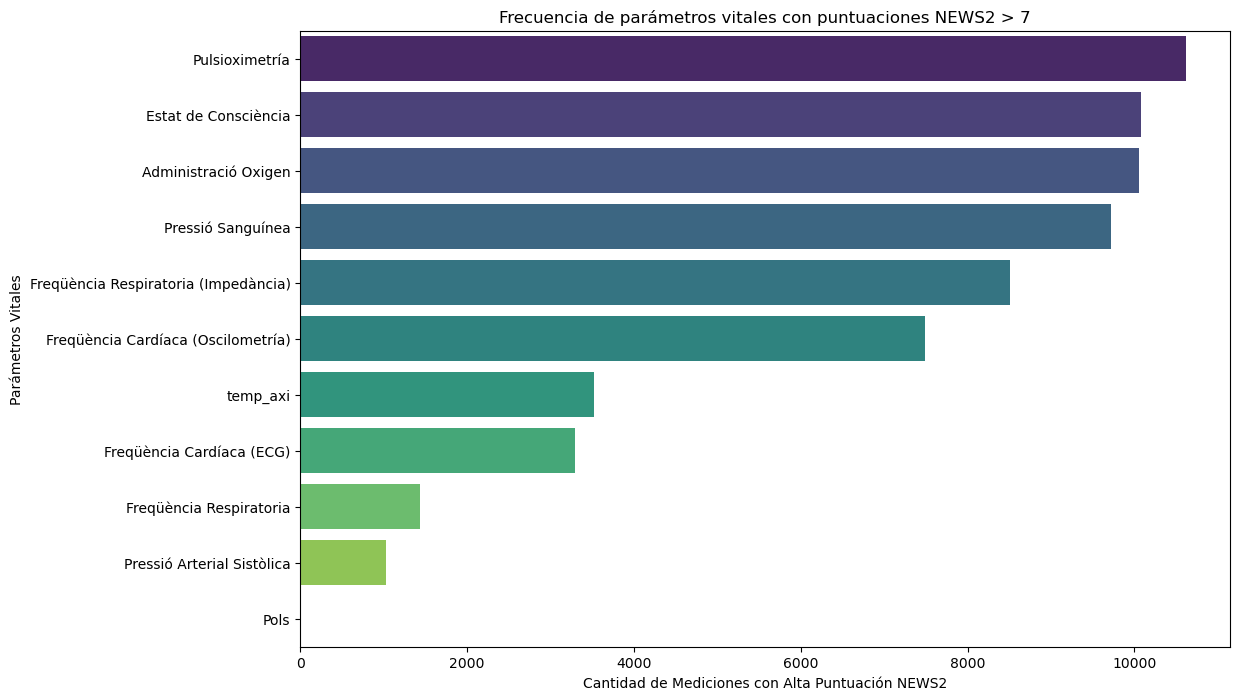

In [50]:
# Diccionari per mapejar els noms de paràmetres
nombre_parametros = {
    'conc_state': 'Estat de Consciència',
    'hr_ecg': 'Freqüència Cardíaca (ECG)',
    'hr_osc': 'Freqüència Cardíaca (Oscilometría)',
    'o2_sup': 'Administració Oxigen',
    'pa_s': 'Pressió Arterial Sistòlica',
    'presn': 'Pressió Sanguínea',
    'pulse': 'Pols',
    'pulsiox': 'Pulsioximetría',
    'rr': 'Freqüència Respiratoria',
    'rr_ip': 'Freqüència Respiratoria (Impedància)'
}

# Crear un DataFrame només amb els paràmetres, els NEWS2 scores i la columna 'UCI'
analysis_data = monitor_events.merge(ward_stay_events[['patient_id', 'to_icu']], on='patient_id')
analysis_data = analysis_data.merge(monitor_dic, on='m_item_id')

# Llista de tots els possibles paràmetres
all_parameters = analysis_data['Item'].unique()

# Filtrar els mesuraments on la puntuació NEWS2 és superior a 7
high_news2_data = analysis_data[analysis_data['m_events_score'] > 7]

# Comptar la freqüència de cada paràmetre vital als mesuraments d'alt NEWS2
high_news2_counts = high_news2_data['Item'].value_counts().reindex(all_parameters, fill_value=0).reset_index()
high_news2_counts.columns = ['Parameter', 'High NEWS2 Count']

# Mapejar noms al DataFrame
high_news2_counts['Parameter'] = high_news2_counts['Parameter'].map(nombre_parametros).fillna(high_news2_counts['Parameter'])

# Ordenar les dades per assegurar que el gràfic mostri els paràmetres en ordre de més a menys freqüència
high_news2_counts = high_news2_counts.sort_values(by='High NEWS2 Count', ascending=False)

# Crear un gràfic de barres per visualitzar les dades
plt.figure(figsize=(12, 8))
sns.barplot(x='High NEWS2 Count', y='Parameter', data=high_news2_counts, palette='viridis')
plt.title('Frecuencia de parámetros vitales con puntuaciones NEWS2 > 7')
plt.xlabel('Cantidad de Mediciones con Alta Puntuación NEWS2')
plt.ylabel('Parámetros Vitales')
plt.show()

C:\Users\jbakk\AppData\Local\Temp\ipykernel_3116\745716504.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  param_data['value'] = pd.to_numeric(param_data['value'], errors='coerce')
C:\Users\jbakk\AppData\Local\Temp\ipykernel_3116\745716504.py:25: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_values = param_data.groupby('news2_range')['value'].mean().reset_index()
C:\Users\jbakk\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN be

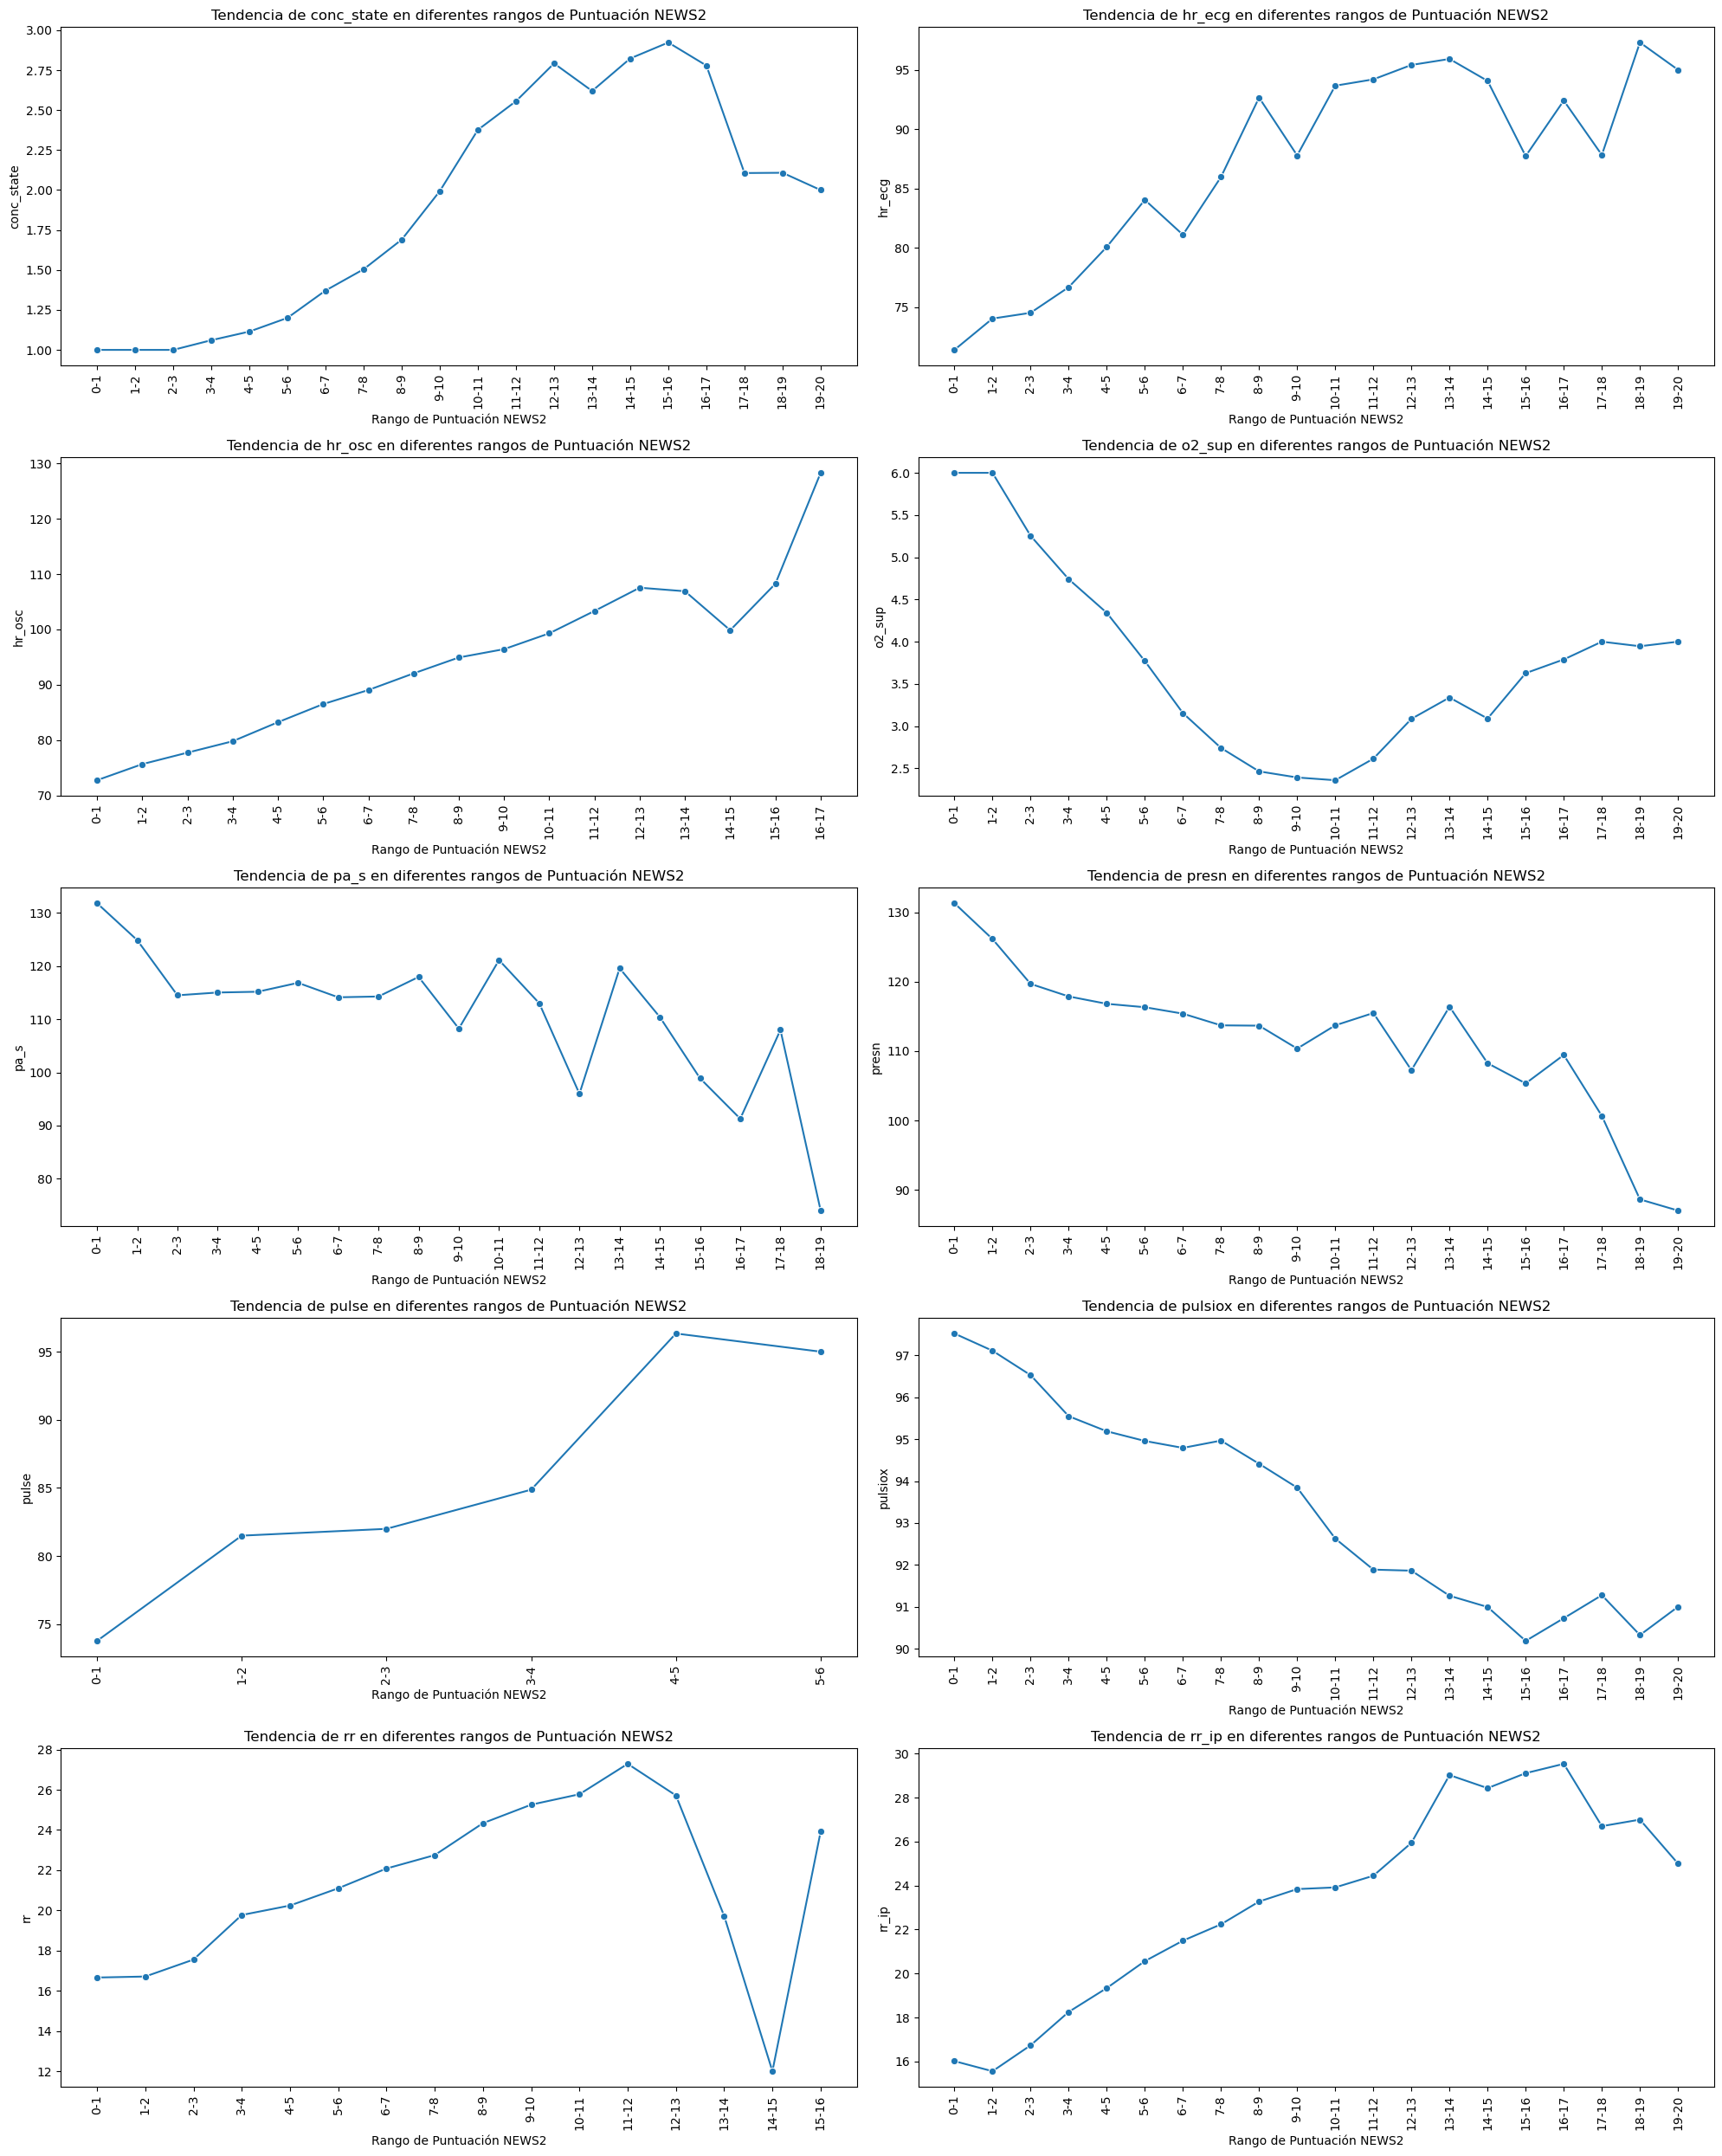

In [51]:
# Pulsioximetria vs NEWS2

# Filtrar els paràmetres rellevants
params = ['conc_state', 'hr_ecg', 'hr_osc', 'o2_sup', 'pa_s', 'presn', 'pulse', 'pulsiox', 'rr', 'rr_ip']

# Crear intervals de puntuació NEWS2
bins = list(range(0, 21))  # Rango de 0 a 20
labels = [f'{i}-{i+1}' for i in range(0, 20)]  # Etiquetes per a cada interval
analysis_data['news2_range'] = pd.cut(analysis_data['m_events_score'], bins=bins, labels=labels, right=False)

# Crear una figura amb subplots
n_cols = 2
n_rows = (len(params) + 1) // n_cols  # Calcula el nombre de files necessari
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(20, n_rows * 5))

# Aplanar la matriu d'eixos per a iterar fàcilment
axes = axes.flatten()

for i, param in enumerate(params):
    
    param_data = analysis_data[analysis_data['Item'] == param]
    param_data['value'] = pd.to_numeric(param_data['value'], errors='coerce')
    
    # Calcular la mitjana dels valors del paràmetre a cada rang de puntuació NEWS2
    mean_values = param_data.groupby('news2_range')['value'].mean().reset_index()

    sns.lineplot(x='news2_range', y='value', data=mean_values, marker='o', ax=axes[i])
    axes[i].set_title(f'Tendencia de {param} en diferentes rangos de Puntuación NEWS2')
    axes[i].set_xlabel('Rango de Puntuación NEWS2')
    axes[i].set_ylabel(param)
    axes[i].tick_params(axis='x', rotation=90)

# Eliminar qualsevol gràfic buit si n'hi ha
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Ajustar el layout perquè els gràfics no se sobreposin
plt.tight_layout()
plt.show()

In [52]:
# Mapejar monitor_events_id als noms dels ítems
monitor_events['item'] = monitor_events['m_item_id'].map(item_names)

# Fusionar les taules de monitorització i esdeveniments d'estada a la sala
merged_df = pd.merge(ward_stay_events, monitor_events[['patient_id', 'm_item_id']], on='patient_id', how='inner')

# Filtrar pacients duplicats
merged_df = merged_df.drop_duplicates(subset=['patient_id'])

# Filtrar pacients que han mort i calcular el conjunt d'ítems de monitorització
deceased_patients = merged_df[merged_df['hosp_mortality_bin'] == 1]
deceased_items = deceased_patients.groupby('patient_id')['m_item_id'].unique()

# Filtrar pacients que han sobreviscut i calcular el conjunt d'ítems de monitorització
survived_patients = merged_df[merged_df['hosp_mortality_bin'] == 0]
survived_items = survived_patients.groupby('patient_id')['m_item_id'].unique()

# Mapejar els ID d'ítems als noms d'ítems
deceased_items = deceased_items.explode().map(item_names)
survived_items = survived_items.explode().map(item_names)

# Comptar el nombre de pacients morts i vius per a cada ítem de monitorització
deceased_counts = deceased_items.value_counts()
survived_counts = survived_items.value_counts()

# Imprimir els resultats
print("Nombre de pacients que han mort per ítem de monitorització:")
print(deceased_counts)
print("\nNombre de pacients que han sobreviscut per ítem de monitorització:")
print(survived_counts)

Nombre de pacients que han mort per ítem de monitorització:
m_item_id
Pulse oximetry                   56
Blood pressure                   35
Conscious state                  29
Heart rate (Oscillometry)        24
Respiratory rate (impedance)     22
Oxygen administration (nasal)    20
Axillary temperature             11
Heart rate (ECG)                  3
Respiratory rate                  2
Systolic arterial pressure        1
Name: count, dtype: int64

Nombre de pacients que han sobreviscut per ítem de monitorització:
m_item_id
Pulse oximetry                   1822
Blood pressure                   1525
Heart rate (Oscillometry)        1085
Conscious state                   932
Respiratory rate (impedance)      633
Oxygen administration (nasal)     594
Axillary temperature              268
Heart rate (ECG)                  143
Respiratory rate                   67
Systolic arterial pressure         16
Pulse rate                          1
Name: count, dtype: int64


#### Lab Events

Distribució dels laboratoris

C:\Users\jbakk\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\jbakk\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\jbakk\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\jbakk\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

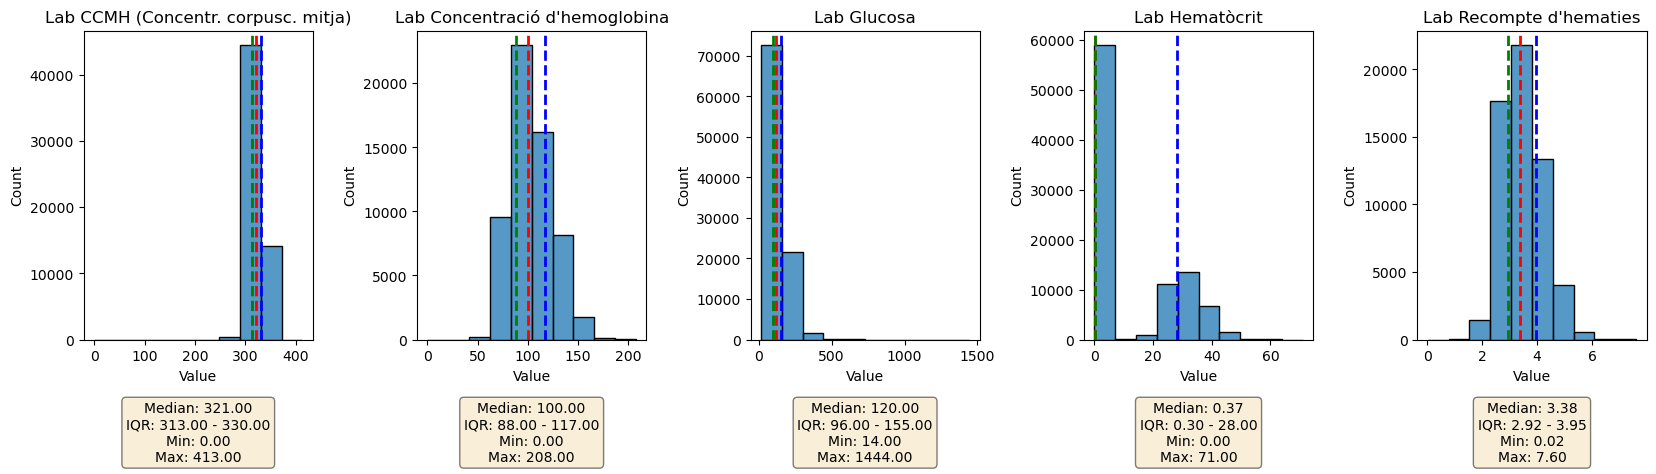

In [53]:
# Crear un diccionari per assignar lab_ref als seus noms respectius
lab_names = {
    100041: 'CCMH (Concentr. corpusc. mitja)',
    100092: 'Glucosa',
    100098: 'Recompte d\'hematies',
    100100: 'Hematòcrit',
    100102: 'Concentració d\'hemoglobina',
}

# Converteix la columna "result_num" en numèrica
lab_events['result_num'] = pd.to_numeric(lab_events['result_num'], errors='coerce')

# Assigna monitor_events_id als noms dels elements
lab_events['lab_name'] = lab_events['lab_ref'].map(lab_names)

# Identificar els 5 lab_ref ​​més freqüents
top_5_labs = lab_events['lab_name'].value_counts().head(5).index

# Filtrar el DataFrame per incloure només aquests 5 laboratoris principals
top_labs_df = lab_events[lab_events['lab_name'].isin(top_5_labs)]

# Crear una graella d'histogrames
labs = top_labs_df.groupby('lab_name')

# Calcular el nombre de files i columnes per al subgràfic
n_labs = len(labs)
rows, cols = divmod(n_labs, 6)
if cols == 0:
    rows -= 1
    cols = 6

# Crear subgràfics
fig, axes = plt.subplots(rows + 1, 6, figsize=(20, 5), constrained_layout=True)

# Aplanar la matriu d'eixos per iterar
axes = axes.flatten()

# Graficar histogrames per a cada laboratori
for i, (lab, lab_data) in enumerate(labs):
    ax = axes[i]
    sns.histplot(data=lab_data, x='result_num', bins=10, edgecolor='black', ax=ax, stat='count')
    ax.set_title(f'Lab {lab}')
    ax.set_xlabel('Value')
    ax.set_ylabel('Count')

    # Calcular estadístiques
    median = lab_data['result_num'].median()
    q1 = lab_data['result_num'].quantile(0.25)
    q3 = lab_data['result_num'].quantile(0.75)
    minimum = lab_data['result_num'].min()
    maximum = lab_data['result_num'].max()

    # Imprimeix valors
    textstr = f'Median: {median:.2f}\nIQR: {q1:.2f} - {q3:.2f}\nMin: {minimum:.2f}\nMax: {maximum:.2f}'
    ax.text(0.5, -0.2, textstr, transform=ax.transAxes, fontsize=10,
            verticalalignment='top', horizontalalignment='center',
            bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

    # Afegir línies verticals per a la mitjana i l'IQR
    ax.axvline(median, color='red', linestyle='dashed', linewidth=2, label='Median')
    ax.axvline(q1, color='green', linestyle='dashed', linewidth=2, label='Q1')
    ax.axvline(q3, color='blue', linestyle='dashed', linewidth=2, label='Q3')

# Eliminar subgràfics buits
for i in range(n_labs, len(axes)):
    fig.delaxes(axes[i])

# Ajustar la disposició i mostrar les trames
plt.tight_layout()
plt.show()

Resolució dels laboratoris

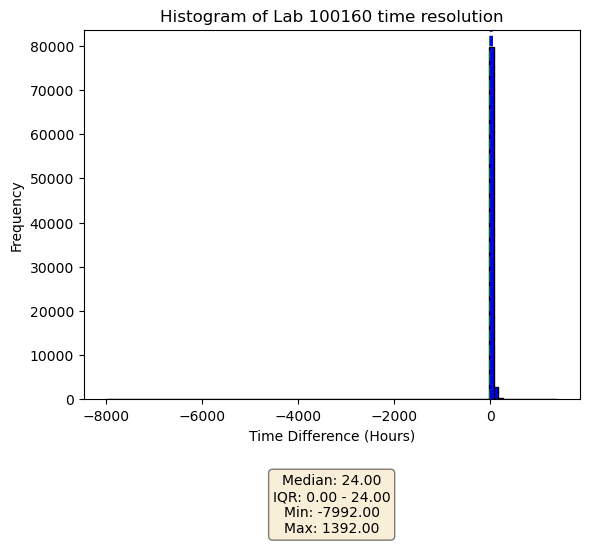

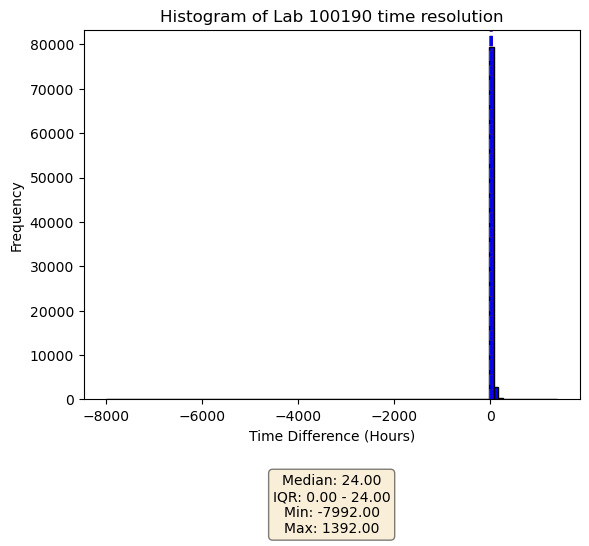

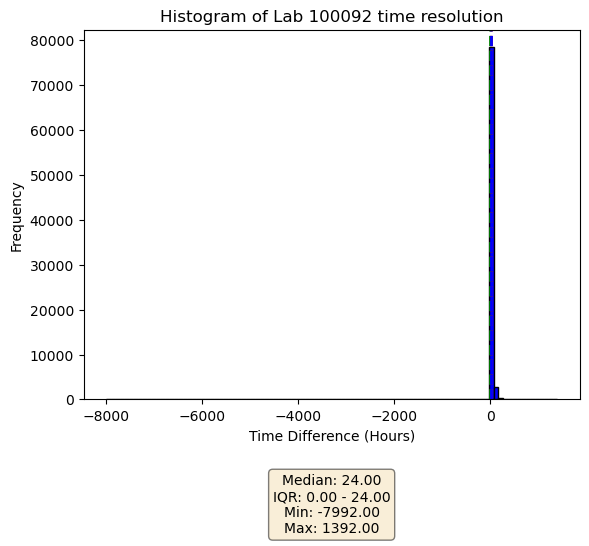

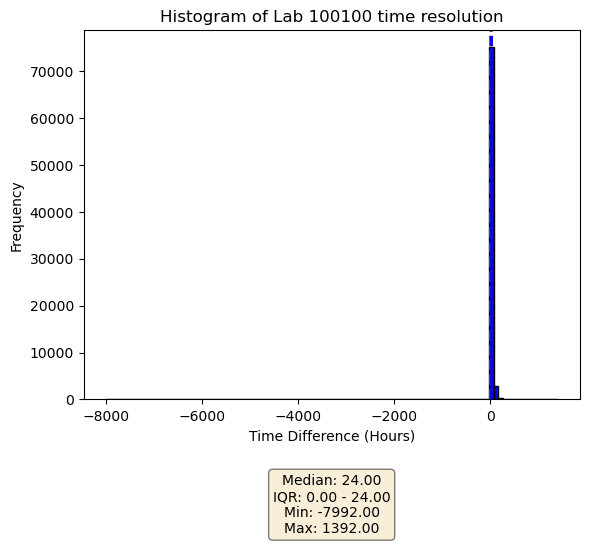

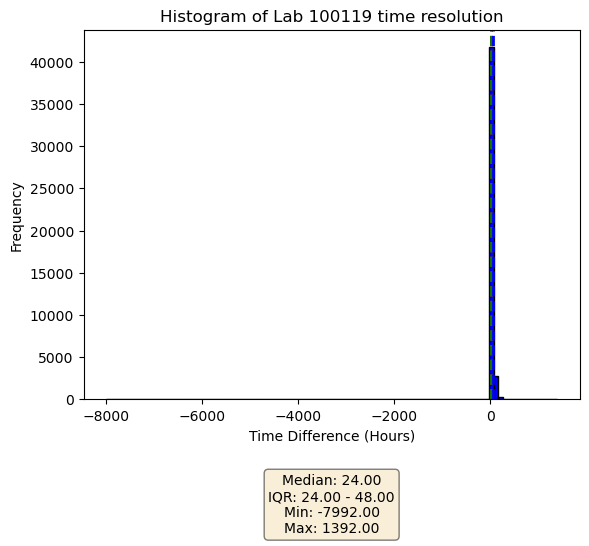

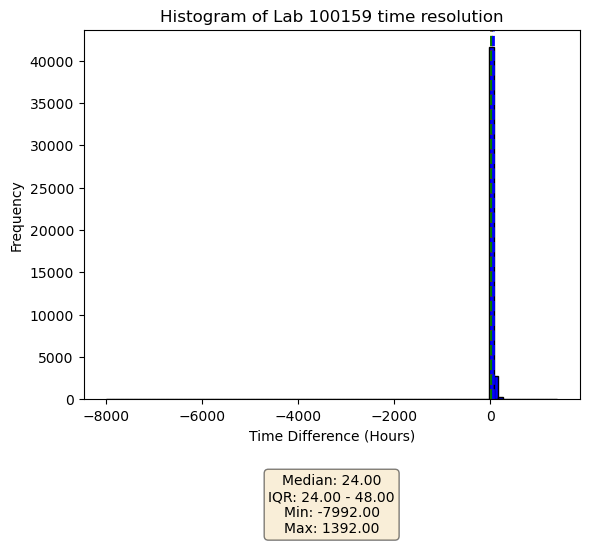

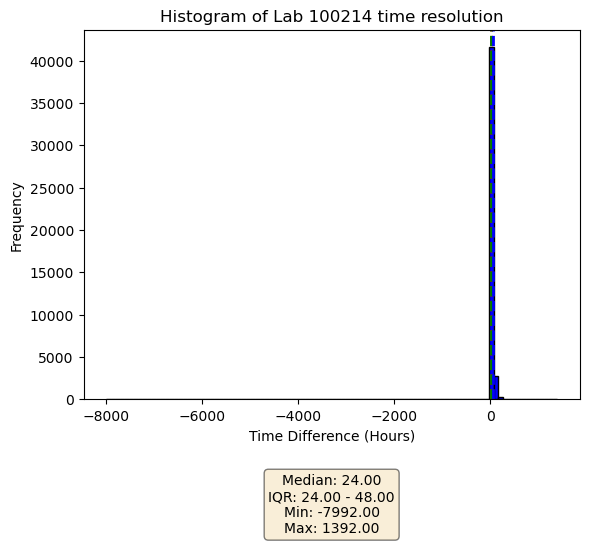

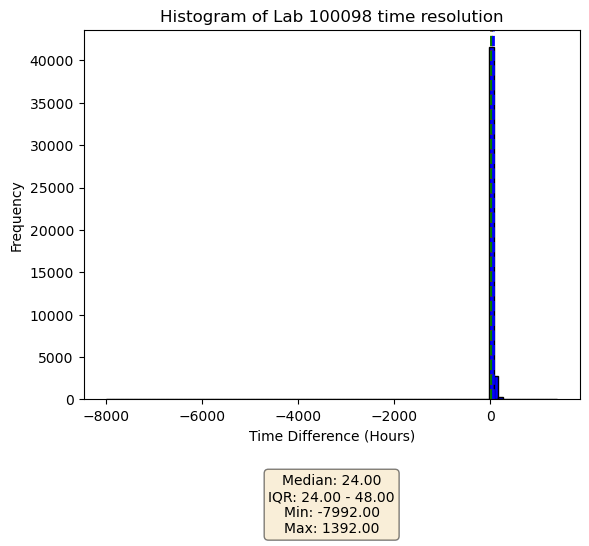

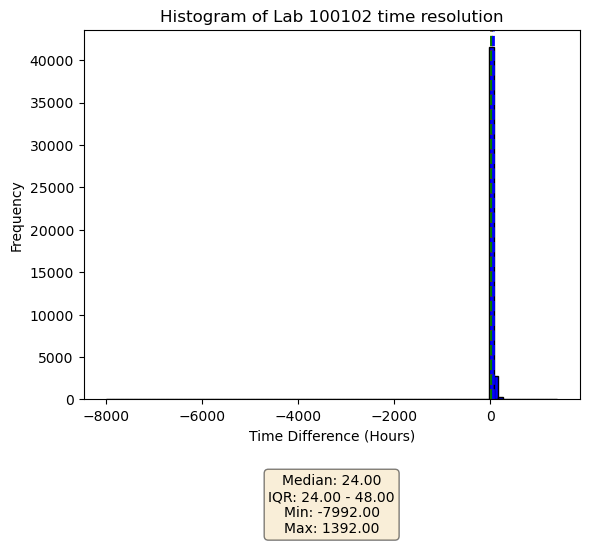

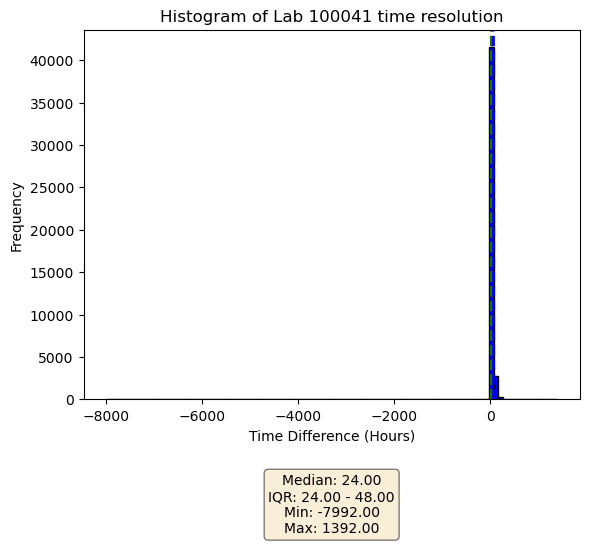

In [54]:
# Convertirla columna "result_num" en numèrica
lab_events['result_num'] = pd.to_numeric(lab_events['result_num'], errors='coerce')

# Identificar els 10 lab_ref ​​més freqüents
top_10_labs = lab_events['lab_ref'].value_counts().head(10).index

# Filtrar el DataFrame per incloure només aquests 10 laboratoris principals
top_labs_df = lab_events[lab_events['lab_ref'].isin(top_10_labs)]

# Crear un diccionari per emmagatzemar DataFrames per a cada lab_ref
lab_events_dict = {lab: top_labs_df[top_labs_df['lab_ref'] == lab].copy() for lab in top_10_labs}

# Crear histogrames i estadístiques per a cada laboratori
for lab, lab_df in lab_events_dict.items():
    # Calculate time resolution in hours
    lab_df['res_date'] = pd.to_datetime(lab_df['res_date'])
    lab_df['lag_res_date'] = lab_df.groupby('ward_stay_id')['res_date'].shift(-1)
    lab_df['time_resolution_hrs'] = (lab_df['lag_res_date'] - lab_df['res_date']).dt.total_seconds() / 3600

    # Crear histograma i calcular estadístiques
    fig, ax = plt.subplots()
    filtered_data = lab_df['time_resolution_hrs'].dropna()
    ax.hist(filtered_data, bins=100, color='blue', edgecolor='black')

    # Personalitza el gràfic
    ax.set(title=f'Histogram of Lab {lab} time resolution', xlabel='Time Difference (Hours)', ylabel='Frequency')

    # Afegir estadístiques al gràfic
    textstr = f'Median: {filtered_data.median():.2f}\nIQR: {filtered_data.quantile(0.25):.2f} - {filtered_data.quantile(0.75):.2f}\nMin: {filtered_data.min():.2f}\nMax: {filtered_data.max():.2f}'
    ax.text(0.5, -0.2, textstr, transform=ax.transAxes, fontsize=10, va='top', ha='center', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

    # Afegir línies verticals per a la mitjana i l'IQR
    ax.axvline(filtered_data.median(), color='red', linestyle='dashed', linewidth=2, label='Median')
    ax.axvline(filtered_data.quantile(0.25), color='green', linestyle='dashed', linewidth=2, label='Q1')
    ax.axvline(filtered_data.quantile(0.75), color='blue', linestyle='dashed', linewidth=2, label='Q3')

    # Mostrar el gràfic
    plt.show()

Disponibilitat dels laboratoris

In [55]:
# Crear un DataFrame per emmagatzemar el recompte i el percentatge de valors que falten
count_df = pd.DataFrame(columns=['Lab', 'Patients Count', 'Patients %', 'Hospital Stays Count', 'Hospital Stays %', 'Ward Stays Count', 'Ward Stays %'])

total_patients_count = top_labs_df['patient_id'].nunique()
total_hospital_stays_count = top_labs_df['hosp_stay_id'].nunique()
total_ward_stays_count = top_labs_df['ward_stay_id'].nunique()

# Crear una llista per emmagatzemar les dades i després fer servir concat per crear el DataFrame
data_list = []

# Recorrer els laboratoris i calcular el recompte i el percentatge de valors que falten
for lab_ref in top_10_labs:
    lab_name = f"Lab {lab_ref}"
    lab_df = top_labs_df[top_labs_df['lab_ref'] == lab_ref]

    lab_patients_count = lab_df['patient_id'].nunique()
    lab_hospital_stays_count = lab_df['hosp_stay_id'].nunique()
    lab_ward_stays_count = lab_df['ward_stay_id'].nunique()

    # Calcular el percentatge del total
    lab_patients_percentage = (lab_patients_count / total_patients_count) * 100
    lab_hospital_stays_percentage = (lab_hospital_stays_count / total_hospital_stays_count) * 100
    lab_ward_stays_percentage = (lab_ward_stays_count / total_ward_stays_count) * 100

    # Afegir les dades a la llista
    data_list.append({
        'Lab': lab_name,
        'Patients Count': lab_patients_count,
        'Patients %': f"{lab_patients_percentage:.2f}%",
        'Hospital Stays Count': lab_hospital_stays_count,
        'Hospital Stays %': f"{lab_hospital_stays_percentage:.2f}%",
        'Ward Stays Count': lab_ward_stays_count,
        'Ward Stays %': f"{lab_ward_stays_percentage:.2f}%"
    })

# Concatenar les dades al DataFrame
count_df = pd.concat([count_df, pd.DataFrame(data_list)], ignore_index=True)

# Ordenar el DataFrame per la columna "Recompte de pacients" en ordre descendent
count_df = count_df.sort_values(by='Patients Count', ascending=False)

# Mostrar el resultat
print(count_df)

          Lab Patients Count Patients % Hospital Stays Count Hospital Stays %  \
3  Lab 100100           8268     99.58%                11770           99.46%   
4  Lab 100119           8191     98.65%                11657           98.50%   
5  Lab 100159           8188     98.61%                11651           98.45%   
6  Lab 100214           8188     98.61%                11650           98.45%   
7  Lab 100098           8187     98.60%                11647           98.42%   
9  Lab 100041           8187     98.60%                11645           98.40%   
8  Lab 100102           8185     98.58%                11644           98.39%   
0  Lab 100160           7961     95.88%                11348           95.89%   
1  Lab 100190           7960     95.87%                11348           95.89%   
2  Lab 100092           7931     95.52%                11304           95.52%   

  Ward Stays Count Ward Stays %  
3            15040       99.37%  
4            14325       94.65%  
5     

#### ANALISIS TEMPORAL

C:\Users\jbakk\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\jbakk\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


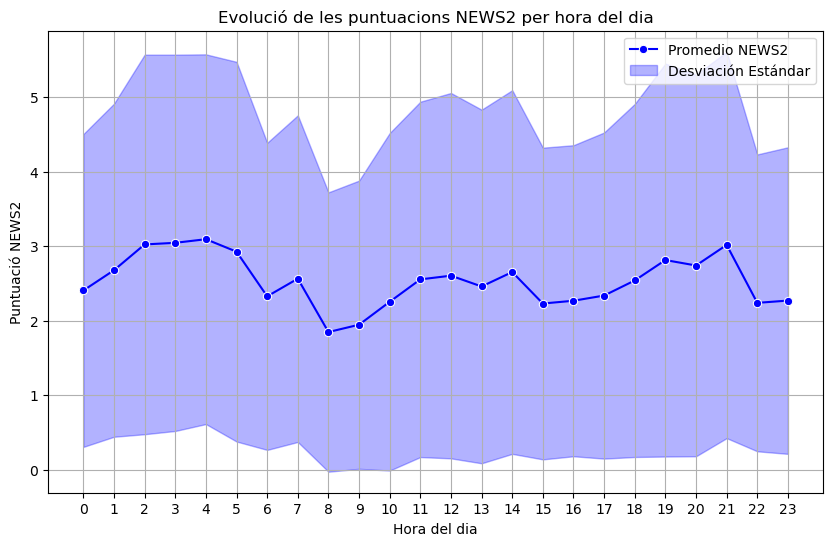

In [56]:
monitor_events['m_events_datetime'] = pd.to_datetime(monitor_events['m_events_datetime'], errors='coerce')

# Agregar de dades per hores del dia
monitor_events['hour'] = monitor_events['m_events_datetime'].dt.hour

# Càlcul d'estadístiques
hourly_stats = monitor_events.groupby('hour')['m_events_score'].agg(['mean', 'std', 'count']).reset_index()

# Visualització de dades
plt.figure(figsize=(10, 6))
sns.lineplot(data=hourly_stats, x='hour', y='mean', marker='o', color='b', label='Promedio NEWS2')
plt.fill_between(hourly_stats['hour'], hourly_stats['mean'] - hourly_stats['std'], hourly_stats['mean'] + hourly_stats['std'], alpha=0.3, color='b', label='Desviación Estándar')
plt.title('Evolució de les puntuacions NEWS2 per hora del dia')
plt.xlabel('Hora del dia')
plt.ylabel('Puntuació NEWS2')
plt.xticks(range(0, 24))
plt.legend()
plt.grid(True)
plt.show()

#### ANALISIS PER SUBGRUPS

##### EDAT

C:\Users\jbakk\AppData\Local\Temp\ipykernel_3116\3827435469.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_stats = age_news2.groupby('grup_edat')['m_events_score'].describe()


              count      mean       std  min  25%  50%  75%   max
grup_edat                                                        
19-30       11406.0  2.086095  1.704867  0.0  1.0  2.0  3.0   9.0
31-40       44111.0  2.077192  1.873730  0.0  1.0  2.0  3.0  12.0
41-50      142529.0  2.345979  2.154989  0.0  1.0  2.0  3.0  15.0
51-60      346337.0  2.425386  2.147759  0.0  1.0  2.0  4.0  18.0
61-70      665897.0  2.298351  2.311137  0.0  1.0  2.0  3.0  20.0
71-80      848539.0  2.262344  2.048915  0.0  1.0  2.0  3.0  15.0
81-90      938027.0  2.506967  2.216505  0.0  1.0  2.0  4.0  15.0
91-100     590624.0  2.374270  2.162428  0.0  1.0  2.0  4.0  16.0


C:\Users\jbakk\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


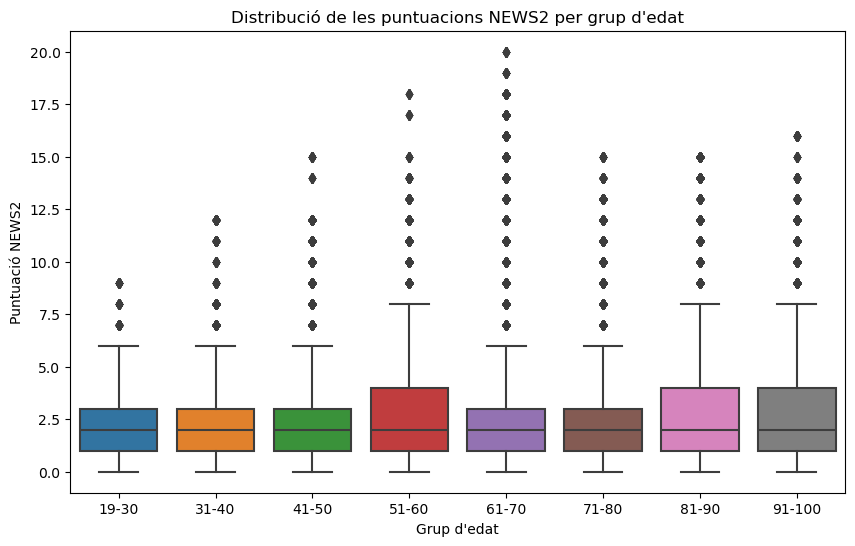

In [57]:
# Unir les taules d'interes
age_news2 = pd.merge(ward_stay_events, analysis_data, on= ('patient_id'), how= 'inner')

# Dividir els pacients en grups d'edat
bins = [18, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['19-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100']

# Filtrar les files amb valors numèrics a la columna 'age'
age_news2['age'] = pd.to_numeric(age_news2['age'], errors='coerce')
age_news2['grup_edat'] = pd.cut(age_news2['age'], bins=bins, labels=labels)

# Calcular les estadístiques resumides de les puntuacions NEWS2 per a cada grup d'edat
age_group_stats = age_news2.groupby('grup_edat')['m_events_score'].describe()

# Mostrar les estadístiques resumides
print(age_group_stats)

# Visualitzar les distribucions de les puntuacions NEWS2 per a cada grup d'edat
plt.figure(figsize=(10, 6))
sns.boxplot(data=age_news2, x='grup_edat', y='m_events_score')
plt.title('Distribució de les puntuacions NEWS2 per grup d\'edat')
plt.xlabel('Grup d\'edat')
plt.ylabel('Puntuació NEWS2')
plt.show()

##### SEXE

C:\Users\jbakk\AppData\Local\Temp\ipykernel_3116\3758193662.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gender_news2['Sex'] = gender_news2['Sex'].map(gender_names)
C:\Users\jbakk\AppData\Local\Temp\ipykernel_3116\3758193662.py:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=gender_news2, x='Sex', y='m_events_score', ci=None)


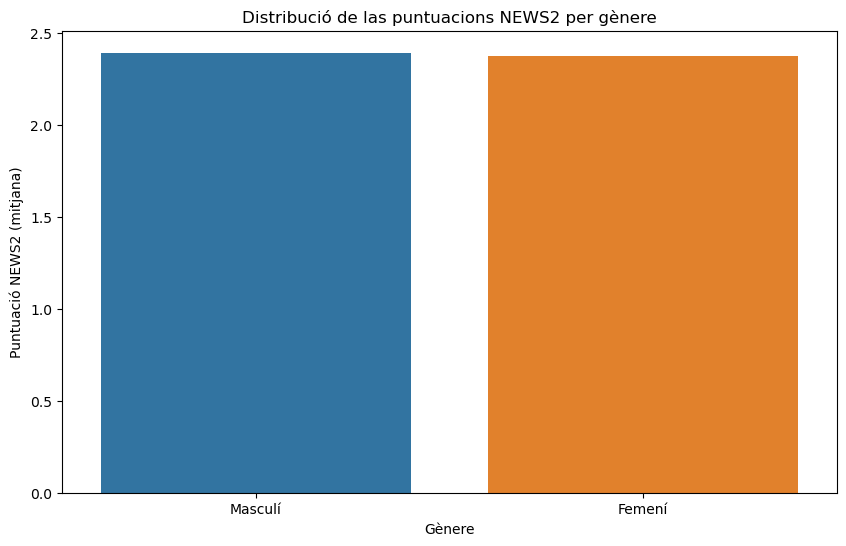

In [58]:
# Unir taules per obtenir el sexe
merge_gender = pd.merge(demog, analysis_data, on= ('patient_id'), how= 'inner')

# Filtrar les dades per génere masculí (Sex == 1) y femení (Sex == 2)
gender_news2 = merge_gender[merge_gender['Sex'].isin([1, 2])]

# Asignar noms als gèneres
gender_names = {1: 'Masculí', 2: 'Femení'}
gender_news2['Sex'] = gender_news2['Sex'].map(gender_names)

# Comparar les distribucions de les puntuaciones NEWS2 entre els diferents grups de gènere
plt.figure(figsize=(10, 6))
sns.barplot(data=gender_news2, x='Sex', y='m_events_score', ci=None)
plt.title('Distribució de las puntuacions NEWS2 per gènere')
plt.xlabel('Gènere')
plt.ylabel('Puntuació NEWS2 (mitjana)')
plt.show()

### Ward Stay Events

In [59]:
# Fusionar les taules utilitzant la columna comuna
merged_table = pd.merge(ward_stay_events, k_anon_set, left_on='patient_id', right_on='patient_deid', how='inner')

# Filtrar pacients morts i comptar el número d'homes
deceased_male_count = merged_table[(merged_table['hosp_mortality_bin'] == 1.0) & (merged_table['Sex'] == 1)]['patient_id'].nunique()

# Filtrar pacients supervivents i comptar el nombre d'homes
survived_male_count = merged_table[(merged_table['hosp_mortality_bin'] == 0.0) & (merged_table['Sex'] == 1)]['patient_id'].nunique()

print("Nombre d'homes morts:", deceased_male_count)
print("Nombre de mascles supervivents:", survived_male_count)

Nombre d'homes morts: 118
Nombre de mascles supervivents: 3552


In [60]:
# Calcular el número total de pacients
total_patients = monitor_events['patient_id'].nunique()

# Fusionar les taules
merged_df = pd.merge(monitor_events, ward_stay_events, on='patient_id', how='left')

# Comptar el nombre total de pacients que han estat a la UCI
total_in_icu = merged_df[merged_df['to_icu'] == 1]['patient_id'].nunique()

# Comptar el nombre total de pacients que no han anat a la UCI
total_not_in_icu = merged_df[merged_df['to_icu'] == 0]['patient_id'].nunique()

print("Nombre total de pacients:", total_patients)
print("Nombre total de pacients a la UCI:", total_in_icu)
print("Nombre total de pacients no a la UCI:", total_not_in_icu)

Nombre total de pacients: 7408
Nombre total de pacients a la UCI: 430
Nombre total de pacients no a la UCI: 7171


In [61]:
# Filtrar valors no numèrics a la columna 'Age'
ward_stay_events['age'] = pd.to_numeric(ward_stay_events['age'], errors='coerce')
ward_stay_events_unique = ward_stay_events.drop_duplicates(subset='patient_id')

# Filtrar pacients que van morir i calcular mitjana i IQR de l'edat
deceased_patients = ward_stay_events[ward_stay_events['hosp_mortality_bin'] == 1.0]
deceased_age_median = deceased_patients['age'].median()
deceased_age_q1 = deceased_patients['age'].quantile(0.25)
deceased_age_q3 = deceased_patients['age'].quantile(0.75)
print("Edat mitjana (IQR) per a pacients morts:", deceased_age_median, "(", deceased_age_q1, "-", deceased_age_q3, ")")

# Filtrar pacients que van sobreviure i calcular mitjana i IQR de l'edat
survived_patients = ward_stay_events[ward_stay_events['hosp_mortality_bin'] == 0.0]
survived_age_median = survived_patients['age'].median()
survived_age_q1 = survived_patients['age'].quantile(0.25)
survived_age_q3 = survived_patients['age'].quantile(0.75)
print("Edat mitjana (IQR) dels pacients supervivents:", survived_age_median, "(", survived_age_q1, "-", survived_age_q3, ")")

Edat mitjana (IQR) per a pacients morts: 78.0 ( 65.0 - 88.0 )
Edat mitjana (IQR) dels pacients supervivents: 78.0 ( 66.0 - 88.0 )


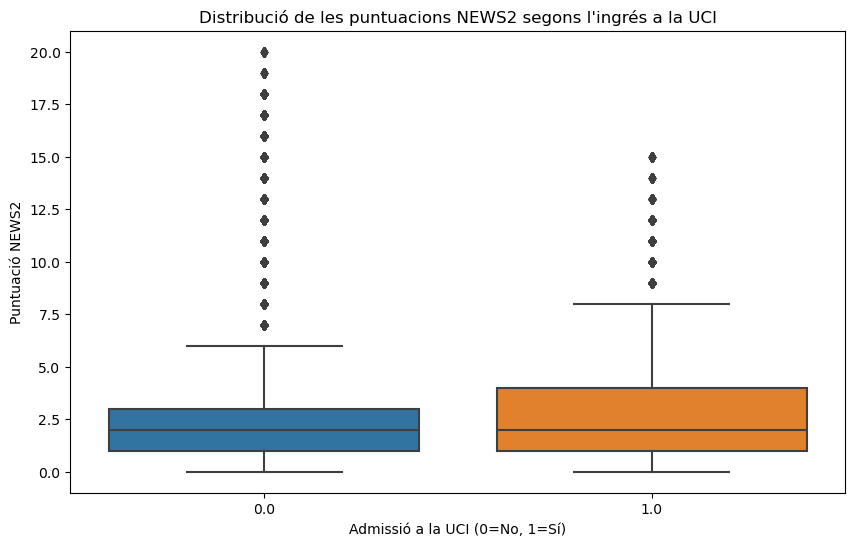

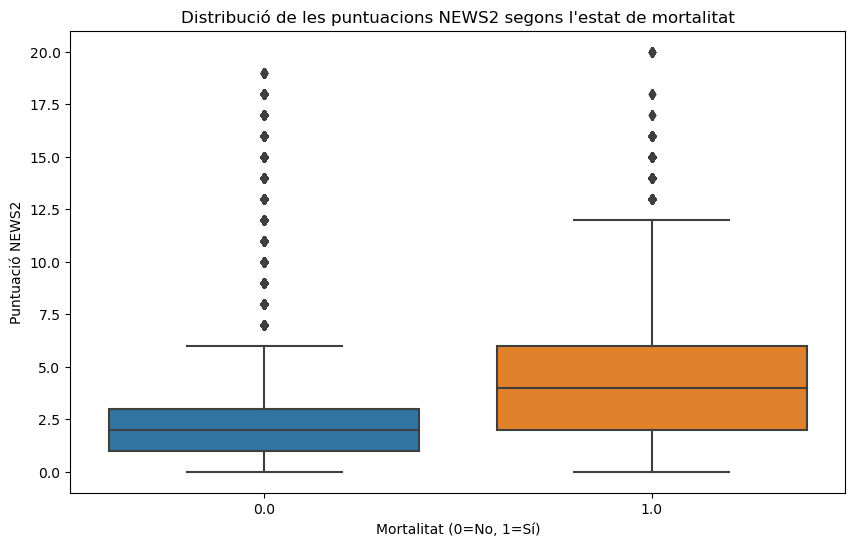

In [62]:
# Unir les taules necessàries
merged_data = pd.merge(ward_stay_events, analysis_data, on=('patient_id', 'hosp_stay_id', 'ward_stay_id'), how='inner')

# Filtrar les files amb valors numèrics a la columna 'NEWS 2'
merged_data = merged_data[merged_data['m_events_score'].apply(lambda x: isinstance(x, (int, float)))]

# Dividir les dades en grups segons l'admissió a l'UCI i l'estat de mortalitat
icu_group = merged_data.groupby('to_icu_y')['m_events_score']
mortality_group = merged_data.groupby('hosp_mortality_bin')['m_events_score']

# Comparar les puntuacions NEWS2 entre els pacients que van ingressar a la UCI i els que no
plt.figure(figsize=(10, 6))
sns.boxplot(data=merged_data, x='to_icu_y', y='m_events_score')
plt.title('Distribució de les puntuacions NEWS2 segons l\'ingrés a la UCI')
plt.xlabel('Admissió a la UCI (0=No, 1=Sí)')
plt.ylabel('Puntuació NEWS2')
plt.show()

# Comparar les puntuacions NEWS2 entre els pacients que van morir i els que van sobreviure
plt.figure(figsize=(10, 6))
sns.boxplot(data=merged_data, x='hosp_mortality_bin', y='m_events_score')
plt.title('Distribució de les puntuacions NEWS2 segons l\'estat de mortalitat')
plt.xlabel('Mortalitat (0=No, 1=Sí)')
plt.ylabel('Puntuació NEWS2')
plt.show()

In [63]:
# Calcular estadístiques descriptives per la puntuació NEWS2 segons l'admissió a la UCI
icu_stats = merged_data.groupby('to_icu_y')['m_events_score'].describe()
print("Estadístiques descriptives segons l'admissió a la UCI:")
print(icu_stats)

# Calcular estadísticas descriptivas para la puntuación NEWS2 segons l'estat de mortalitat
mortality_stats = merged_data.groupby('hosp_mortality_bin')['m_events_score'].describe()
print("Estadístiques descriptives segons l'estat de mortalitat:")
print(mortality_stats)

Estadístiques descriptives segons l'admissió a la UCI:
              count      mean       std  min  25%  50%  75%   max
to_icu_y                                                         
0.0       3772319.0  2.317543  2.177128  0.0  1.0  2.0  3.0  20.0
1.0        347500.0  2.496742  2.208416  0.0  1.0  2.0  4.0  15.0
Estadístiques descriptives segons l'estat de mortalitat:
                        count      mean       std  min  25%  50%  75%   max
hosp_mortality_bin                                                         
0.0                 3949404.0  2.240312  2.090460  0.0  1.0  2.0  3.0  19.0
1.0                  170415.0  4.472799  2.978843  0.0  2.0  4.0  6.0  20.0
